## La Liga Hyperparameter Tuning

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

# making all pandas columns visable with display command
pd.set_option('display.max_columns', 500)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam

In [2]:
train=pd.read_csv("datasets/laliga_data_train_onehot.csv")
test=pd.read_csv("datasets/laliga_data_test_onehot.csv")
# print(train.head())
# print(train.shape)

In [3]:
X_train = train.drop(columns = ['FTR'])
y_train = train['FTR']
print(X_train.shape)
print(y_train.shape)

(2660, 29)
(2660,)


In [4]:
X_test = test.drop(columns = ['FTR'])
y_test = test['FTR']
print(X_test.shape)
print(y_test.shape)

(380, 29)
(380,)


In [5]:
columns = X_train.shape[1]
columns

29

In [6]:
# 41-75-3
# We first need to define the sequence of dependencies (the computational graph)
# x = Input(shape=(20,32))
def fit_model(learning_rate, hidden_layer, dropout, batch_size):
    x = Input(shape=(columns,))
    # h = Conv2D(32, (7, 7), strides=(2, 2))(x)
    # h = Activation('relu')(x)
    h = Flatten()(x)
    for i in hidden_layer:
        h = Dense(i, activation = 'relu')(h)
    # for i in range(10):
    #     h = Dense(75)(h)
    h = Dropout(dropout)(h)
    p = Activation('softmax')(h)

    # Now that we have defined how to find p from x, we can create a 
    # model simply by saying what is input and what is output
    model = Model(inputs=x, outputs=p)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=learning_rate), metrics=['accuracy'])
    model.summary()
    
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=200, validation_split=0.04)
    return history,model

In [7]:
#hyperparam tuning
#learning_rate
# learning_rates = [1e-5,1e-6,1e-7]
learning_rates = [1e-5,1e-6]
#hidden_layers
# hidden_layers = [[41,75],[41,10],[41,10,10,10]]
hidden_layers = [[41,75],[41,10,10,10]]
#dropout
dropouts = [0,.3,.5,.7]
# dropouts = [.3,.5]
#batch_size
# batch_sizes = [8,16,32,64]
batch_sizes = [16,32]
#result
result = {}
best_history = None
best_val_accuracy = 0
best_model = None

for lr in learning_rates:
    for hl in hidden_layers:
        hl_str = '-'.join(map(str, hl))+'-3'
        for dp in dropouts:
            for bs in batch_sizes:
                history, model = fit_model(lr, hl, dp, bs)
                tmp = {}
                tmp['loss'] = history.history['loss'][-1]
                tmp['accuracy'] = history.history['accuracy'][-1]
                tmp['val_loss'] = history.history['val_loss'][-1]
                tmp['val_accuracy'] = history.history['val_accuracy'][-1]
    #             print(history)
                result[(lr,hl_str,dp, bs)] = tmp
                print(tmp['val_accuracy'], tmp)
                if tmp['val_accuracy'] > best_val_accuracy:
                    best_val_accuracy = tmp['val_accuracy']
                    best_history = history
                    best_model = model
                
                
            

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 29)]              0         
_________________________________________________________________
flatten (Flatten)            (None, 29)                0         
_________________________________________________________________
dense (Dense)                (None, 41)                1230      
_________________________________________________________________
dense_1 (Dense)              (None, 75)                3150      
_________________________________________________________________
dropout (Dropout)            (None, 75)                0         
_________________________________________________________________
activation (Activation)      (None, 75)                0         
Total params: 4,380
Trainable params: 4,380
Non-trainable params: 0
___________________________________________________________

Epoch 50/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2622 - accuracy: 0.5280 - val_loss: 2.2886 - val_accuracy: 0.4673
Epoch 51/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2493 - accuracy: 0.5272 - val_loss: 2.2765 - val_accuracy: 0.4579
Epoch 52/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2371 - accuracy: 0.5288 - val_loss: 2.2647 - val_accuracy: 0.4579
Epoch 53/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2253 - accuracy: 0.5296 - val_loss: 2.2538 - val_accuracy: 0.4579
Epoch 54/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2142 - accuracy: 0.5315 - val_loss: 2.2433 - val_accuracy: 0.4766
Epoch 55/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2037 - accuracy: 0.5319 - val_loss: 2.2335 - val_accuracy: 0.4766
Epoch 56/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1935 - accuracy: 0.5323 - val_loss: 2.2236 - val_accuracy:

Epoch 107/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0339 - accuracy: 0.5394 - val_loss: 2.0669 - val_accuracy: 0.5047
Epoch 108/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0333 - accuracy: 0.5405 - val_loss: 2.0664 - val_accuracy: 0.5047
Epoch 109/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0328 - accuracy: 0.5390 - val_loss: 2.0659 - val_accuracy: 0.5047
Epoch 110/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0323 - accuracy: 0.5394 - val_loss: 2.0654 - val_accuracy: 0.5047
Epoch 111/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0318 - accuracy: 0.5405 - val_loss: 2.0648 - val_accuracy: 0.5140
Epoch 112/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0314 - accuracy: 0.5390 - val_loss: 2.0639 - val_accuracy: 0.5047
Epoch 113/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0309 - accuracy: 0.5398 - val_loss: 2.0639 - val_ac

160/160 [==============================] - 0s 2ms/step - loss: 2.0139 - accuracy: 0.5452 - val_loss: 2.0478 - val_accuracy: 0.5234
Epoch 164/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0137 - accuracy: 0.5452 - val_loss: 2.0475 - val_accuracy: 0.5234
Epoch 165/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0134 - accuracy: 0.5452 - val_loss: 2.0473 - val_accuracy: 0.5234
Epoch 166/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0132 - accuracy: 0.5441 - val_loss: 2.0469 - val_accuracy: 0.5234
Epoch 167/200
160/160 [==============================] - 0s 3ms/step - loss: 2.0129 - accuracy: 0.5452 - val_loss: 2.0469 - val_accuracy: 0.5234
Epoch 168/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0127 - accuracy: 0.5452 - val_loss: 2.0465 - val_accuracy: 0.5234
Epoch 169/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0124 - accuracy: 0.5460 - val_loss: 2.0463 - val_accuracy: 0.5234

Epoch 11/200
80/80 [==============================] - 0s 2ms/step - loss: 4.4705 - accuracy: 0.0149 - val_loss: 4.4845 - val_accuracy: 0.0093
Epoch 12/200
80/80 [==============================] - 0s 2ms/step - loss: 4.4469 - accuracy: 0.0188 - val_loss: 4.4623 - val_accuracy: 0.0093
Epoch 13/200
80/80 [==============================] - 0s 3ms/step - loss: 4.4235 - accuracy: 0.0215 - val_loss: 4.4408 - val_accuracy: 0.0093
Epoch 14/200
80/80 [==============================] - 0s 3ms/step - loss: 4.4004 - accuracy: 0.0274 - val_loss: 4.4195 - val_accuracy: 0.0093
Epoch 15/200
80/80 [==============================] - 0s 3ms/step - loss: 4.3774 - accuracy: 0.0341 - val_loss: 4.3981 - val_accuracy: 0.0093
Epoch 16/200
80/80 [==============================] - 0s 2ms/step - loss: 4.3544 - accuracy: 0.0403 - val_loss: 4.3770 - val_accuracy: 0.0093
Epoch 17/200
80/80 [==============================] - 0s 3ms/step - loss: 4.3313 - accuracy: 0.0458 - val_loss: 4.3558 - val_accuracy: 0.0093
Epoch 

Epoch 69/200
80/80 [==============================] - 0s 2ms/step - loss: 3.2992 - accuracy: 0.2871 - val_loss: 3.4575 - val_accuracy: 0.2243
Epoch 70/200
80/80 [==============================] - 0s 2ms/step - loss: 3.2913 - accuracy: 0.2871 - val_loss: 3.4506 - val_accuracy: 0.2243
Epoch 71/200
80/80 [==============================] - 0s 3ms/step - loss: 3.2839 - accuracy: 0.2863 - val_loss: 3.4440 - val_accuracy: 0.2243
Epoch 72/200
80/80 [==============================] - 0s 3ms/step - loss: 3.2767 - accuracy: 0.2855 - val_loss: 3.4379 - val_accuracy: 0.2243
Epoch 73/200
80/80 [==============================] - 0s 3ms/step - loss: 3.2699 - accuracy: 0.2859 - val_loss: 3.4320 - val_accuracy: 0.2243
Epoch 74/200
80/80 [==============================] - 0s 2ms/step - loss: 3.2635 - accuracy: 0.2859 - val_loss: 3.4262 - val_accuracy: 0.2243
Epoch 75/200
80/80 [==============================] - 0s 2ms/step - loss: 3.2573 - accuracy: 0.2859 - val_loss: 3.4208 - val_accuracy: 0.2243
Epoch 

80/80 [==============================] - 0s 2ms/step - loss: 2.2442 - accuracy: 0.2879 - val_loss: 2.3007 - val_accuracy: 0.2617
Epoch 127/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2141 - accuracy: 0.2879 - val_loss: 2.2706 - val_accuracy: 0.2617
Epoch 128/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1847 - accuracy: 0.2914 - val_loss: 2.2418 - val_accuracy: 0.2617
Epoch 129/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1560 - accuracy: 0.2910 - val_loss: 2.2125 - val_accuracy: 0.2617
Epoch 130/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1276 - accuracy: 0.2949 - val_loss: 2.1845 - val_accuracy: 0.2617
Epoch 131/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0997 - accuracy: 0.2961 - val_loss: 2.1571 - val_accuracy: 0.2804
Epoch 132/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0723 - accuracy: 0.3024 - val_loss: 2.1296 - val_accuracy: 0.2897
Epoch 133/200

80/80 [==============================] - 0s 2ms/step - loss: 1.2693 - accuracy: 0.4920 - val_loss: 1.3325 - val_accuracy: 0.5234
Epoch 184/200
80/80 [==============================] - 0s 2ms/step - loss: 1.2626 - accuracy: 0.4928 - val_loss: 1.3254 - val_accuracy: 0.5234
Epoch 185/200
80/80 [==============================] - 0s 2ms/step - loss: 1.2561 - accuracy: 0.4947 - val_loss: 1.3184 - val_accuracy: 0.5234
Epoch 186/200
80/80 [==============================] - 0s 2ms/step - loss: 1.2498 - accuracy: 0.4951 - val_loss: 1.3116 - val_accuracy: 0.5140
Epoch 187/200
80/80 [==============================] - 0s 2ms/step - loss: 1.2436 - accuracy: 0.4978 - val_loss: 1.3051 - val_accuracy: 0.5047
Epoch 188/200
80/80 [==============================] - 0s 2ms/step - loss: 1.2377 - accuracy: 0.4986 - val_loss: 1.2986 - val_accuracy: 0.5047
Epoch 189/200
80/80 [==============================] - 0s 2ms/step - loss: 1.2319 - accuracy: 0.4994 - val_loss: 1.2924 - val_accuracy: 0.5047
Epoch 190/200

Epoch 31/200
160/160 [==============================] - 0s 2ms/step - loss: 2.9832 - accuracy: 0.3533 - val_loss: 2.7513 - val_accuracy: 0.3832
Epoch 32/200
160/160 [==============================] - 0s 2ms/step - loss: 2.9509 - accuracy: 0.3651 - val_loss: 2.6921 - val_accuracy: 0.3925
Epoch 33/200
160/160 [==============================] - 0s 2ms/step - loss: 2.8742 - accuracy: 0.3705 - val_loss: 2.6341 - val_accuracy: 0.4019
Epoch 34/200
160/160 [==============================] - 0s 2ms/step - loss: 2.8291 - accuracy: 0.3799 - val_loss: 2.5785 - val_accuracy: 0.4019
Epoch 35/200
160/160 [==============================] - 0s 2ms/step - loss: 2.8278 - accuracy: 0.3831 - val_loss: 2.5288 - val_accuracy: 0.4393
Epoch 36/200
160/160 [==============================] - 0s 2ms/step - loss: 2.7643 - accuracy: 0.3882 - val_loss: 2.4788 - val_accuracy: 0.4579
Epoch 37/200
160/160 [==============================] - 0s 2ms/step - loss: 2.7694 - accuracy: 0.3776 - val_loss: 2.4331 - val_accuracy:

Epoch 88/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4011 - accuracy: 0.4516 - val_loss: 1.8051 - val_accuracy: 0.4953
Epoch 89/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3366 - accuracy: 0.4454 - val_loss: 1.8034 - val_accuracy: 0.5047
Epoch 90/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3218 - accuracy: 0.4489 - val_loss: 1.8005 - val_accuracy: 0.4860
Epoch 91/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3614 - accuracy: 0.4528 - val_loss: 1.8002 - val_accuracy: 0.4860
Epoch 92/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3284 - accuracy: 0.4418 - val_loss: 1.7980 - val_accuracy: 0.4860
Epoch 93/200
160/160 [==============================] - 0s 3ms/step - loss: 2.3292 - accuracy: 0.4563 - val_loss: 1.7958 - val_accuracy: 0.4860
Epoch 94/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4123 - accuracy: 0.4340 - val_loss: 1.7968 - val_accuracy:

160/160 [==============================] - 0s 2ms/step - loss: 2.3097 - accuracy: 0.4458 - val_loss: 1.7629 - val_accuracy: 0.5140
Epoch 145/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3683 - accuracy: 0.4383 - val_loss: 1.7653 - val_accuracy: 0.5140
Epoch 146/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3230 - accuracy: 0.4520 - val_loss: 1.7653 - val_accuracy: 0.5140
Epoch 147/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3698 - accuracy: 0.4360 - val_loss: 1.7658 - val_accuracy: 0.5140
Epoch 148/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3005 - accuracy: 0.4465 - val_loss: 1.7630 - val_accuracy: 0.5140
Epoch 149/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3086 - accuracy: 0.4505 - val_loss: 1.7611 - val_accuracy: 0.5234
Epoch 150/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3394 - accuracy: 0.4442 - val_loss: 1.7618 - val_accuracy: 0.5234

160/160 [==============================] - 0s 2ms/step - loss: 2.2833 - accuracy: 0.4669 - val_loss: 1.7353 - val_accuracy: 0.5234
0.5233644843101501 {'loss': 2.2832677364349365, 'accuracy': 0.4669016897678375, 'val_loss': 1.7352514266967773, 'val_accuracy': 0.5233644843101501}
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 29)]              0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 29)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 41)                1230      
_________________________________________________________________
dense_7 (Dense)              (None, 75)                3150      
_________________________________________________________________
dropout_3 (Dropout)          (None, 75)     

Epoch 49/200
80/80 [==============================] - 0s 2ms/step - loss: 2.9616 - accuracy: 0.3713 - val_loss: 2.7699 - val_accuracy: 0.4953
Epoch 50/200
80/80 [==============================] - 0s 2ms/step - loss: 2.9657 - accuracy: 0.3764 - val_loss: 2.7387 - val_accuracy: 0.5047
Epoch 51/200
80/80 [==============================] - 0s 2ms/step - loss: 2.9214 - accuracy: 0.3752 - val_loss: 2.7089 - val_accuracy: 0.5140
Epoch 52/200
80/80 [==============================] - 0s 2ms/step - loss: 2.8861 - accuracy: 0.3862 - val_loss: 2.6789 - val_accuracy: 0.5047
Epoch 53/200
80/80 [==============================] - 0s 2ms/step - loss: 2.8885 - accuracy: 0.3944 - val_loss: 2.6508 - val_accuracy: 0.5140
Epoch 54/200
80/80 [==============================] - 0s 2ms/step - loss: 2.8084 - accuracy: 0.3980 - val_loss: 2.6221 - val_accuracy: 0.5234
Epoch 55/200
80/80 [==============================] - 0s 2ms/step - loss: 2.8124 - accuracy: 0.3960 - val_loss: 2.5936 - val_accuracy: 0.5234
Epoch 

80/80 [==============================] - 0s 2ms/step - loss: 2.4345 - accuracy: 0.4238 - val_loss: 1.8984 - val_accuracy: 0.5234
Epoch 107/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4467 - accuracy: 0.4234 - val_loss: 1.8936 - val_accuracy: 0.5234
Epoch 108/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4316 - accuracy: 0.4230 - val_loss: 1.8894 - val_accuracy: 0.5234
Epoch 109/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4093 - accuracy: 0.4234 - val_loss: 1.8845 - val_accuracy: 0.5234
Epoch 110/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4985 - accuracy: 0.4160 - val_loss: 1.8814 - val_accuracy: 0.5234
Epoch 111/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4267 - accuracy: 0.4399 - val_loss: 1.8782 - val_accuracy: 0.5234
Epoch 112/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4370 - accuracy: 0.4195 - val_loss: 1.8746 - val_accuracy: 0.5234
Epoch 113/200

80/80 [==============================] - 0s 2ms/step - loss: 2.4084 - accuracy: 0.4258 - val_loss: 1.7973 - val_accuracy: 0.5234
Epoch 164/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3856 - accuracy: 0.4391 - val_loss: 1.7979 - val_accuracy: 0.5234
Epoch 165/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3557 - accuracy: 0.4348 - val_loss: 1.7963 - val_accuracy: 0.5234
Epoch 166/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4571 - accuracy: 0.4121 - val_loss: 1.7982 - val_accuracy: 0.5234
Epoch 167/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3985 - accuracy: 0.4305 - val_loss: 1.7977 - val_accuracy: 0.5234
Epoch 168/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3436 - accuracy: 0.4399 - val_loss: 1.7973 - val_accuracy: 0.5234
Epoch 169/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4532 - accuracy: 0.4219 - val_loss: 1.7977 - val_accuracy: 0.5234
Epoch 170/200

160/160 [==============================] - 0s 2ms/step - loss: 4.3970 - accuracy: 0.0967 - val_loss: 3.9091 - val_accuracy: 0.1402
Epoch 12/200
160/160 [==============================] - 0s 2ms/step - loss: 4.3326 - accuracy: 0.1085 - val_loss: 3.8737 - val_accuracy: 0.1402
Epoch 13/200
160/160 [==============================] - 0s 2ms/step - loss: 4.2804 - accuracy: 0.1065 - val_loss: 3.8394 - val_accuracy: 0.1402
Epoch 14/200
160/160 [==============================] - 0s 2ms/step - loss: 4.2452 - accuracy: 0.1124 - val_loss: 3.8056 - val_accuracy: 0.1495
Epoch 15/200
160/160 [==============================] - 0s 2ms/step - loss: 4.2114 - accuracy: 0.1112 - val_loss: 3.7730 - val_accuracy: 0.1495
Epoch 16/200
160/160 [==============================] - 0s 2ms/step - loss: 4.1093 - accuracy: 0.1230 - val_loss: 3.7389 - val_accuracy: 0.1682
Epoch 17/200
160/160 [==============================] - 0s 2ms/step - loss: 4.0989 - accuracy: 0.1289 - val_loss: 3.7076 - val_accuracy: 0.1963
Epoch

Epoch 68/200
160/160 [==============================] - 0s 2ms/step - loss: 3.0254 - accuracy: 0.3584 - val_loss: 2.6436 - val_accuracy: 0.5327
Epoch 69/200
160/160 [==============================] - 0s 2ms/step - loss: 3.0865 - accuracy: 0.3482 - val_loss: 2.6405 - val_accuracy: 0.5234
Epoch 70/200
160/160 [==============================] - 0s 2ms/step - loss: 3.0391 - accuracy: 0.3729 - val_loss: 2.6325 - val_accuracy: 0.5327
Epoch 71/200
160/160 [==============================] - 0s 2ms/step - loss: 3.0519 - accuracy: 0.3596 - val_loss: 2.6304 - val_accuracy: 0.5327
Epoch 72/200
160/160 [==============================] - 0s 2ms/step - loss: 3.1075 - accuracy: 0.3478 - val_loss: 2.6291 - val_accuracy: 0.5327
Epoch 73/200
160/160 [==============================] - 0s 2ms/step - loss: 3.0670 - accuracy: 0.3557 - val_loss: 2.6246 - val_accuracy: 0.5234
Epoch 74/200
160/160 [==============================] - 0s 2ms/step - loss: 3.0207 - accuracy: 0.3709 - val_loss: 2.6198 - val_accuracy:

Epoch 125/200
160/160 [==============================] - 0s 2ms/step - loss: 2.9664 - accuracy: 0.3866 - val_loss: 2.5149 - val_accuracy: 0.5421
Epoch 126/200
160/160 [==============================] - 0s 2ms/step - loss: 2.9802 - accuracy: 0.3913 - val_loss: 2.5111 - val_accuracy: 0.5421
Epoch 127/200
160/160 [==============================] - 0s 2ms/step - loss: 2.9259 - accuracy: 0.3968 - val_loss: 2.5082 - val_accuracy: 0.5421
Epoch 128/200
160/160 [==============================] - 0s 2ms/step - loss: 3.0035 - accuracy: 0.3819 - val_loss: 2.5100 - val_accuracy: 0.5421
Epoch 129/200
160/160 [==============================] - 0s 2ms/step - loss: 2.8991 - accuracy: 0.4027 - val_loss: 2.5065 - val_accuracy: 0.5421
Epoch 130/200
160/160 [==============================] - 0s 2ms/step - loss: 2.9786 - accuracy: 0.3878 - val_loss: 2.5061 - val_accuracy: 0.5421
Epoch 131/200
160/160 [==============================] - 0s 2ms/step - loss: 3.0180 - accuracy: 0.3815 - val_loss: 2.5052 - val_ac

160/160 [==============================] - 0s 2ms/step - loss: 2.9738 - accuracy: 0.3796 - val_loss: 2.4760 - val_accuracy: 0.5421
Epoch 182/200
160/160 [==============================] - 0s 2ms/step - loss: 2.9158 - accuracy: 0.3960 - val_loss: 2.4729 - val_accuracy: 0.5421
Epoch 183/200
160/160 [==============================] - 0s 2ms/step - loss: 2.9398 - accuracy: 0.4011 - val_loss: 2.4718 - val_accuracy: 0.5421
Epoch 184/200
160/160 [==============================] - 0s 2ms/step - loss: 2.9793 - accuracy: 0.3788 - val_loss: 2.4741 - val_accuracy: 0.5327
Epoch 185/200
160/160 [==============================] - 0s 2ms/step - loss: 2.9628 - accuracy: 0.3878 - val_loss: 2.4757 - val_accuracy: 0.5421
Epoch 186/200
160/160 [==============================] - 0s 2ms/step - loss: 3.0060 - accuracy: 0.3878 - val_loss: 2.4774 - val_accuracy: 0.5327
Epoch 187/200
160/160 [==============================] - 0s 2ms/step - loss: 2.9312 - accuracy: 0.4042 - val_loss: 2.4757 - val_accuracy: 0.5327

80/80 [==============================] - 0s 2ms/step - loss: 4.0613 - accuracy: 0.1876 - val_loss: 3.4875 - val_accuracy: 0.3551
Epoch 30/200
80/80 [==============================] - 0s 2ms/step - loss: 4.0839 - accuracy: 0.1778 - val_loss: 3.4692 - val_accuracy: 0.3645
Epoch 31/200
80/80 [==============================] - 0s 2ms/step - loss: 4.0155 - accuracy: 0.1908 - val_loss: 3.4496 - val_accuracy: 0.3645
Epoch 32/200
80/80 [==============================] - 0s 2ms/step - loss: 3.9998 - accuracy: 0.1939 - val_loss: 3.4303 - val_accuracy: 0.3645
Epoch 33/200
80/80 [==============================] - 0s 2ms/step - loss: 3.9771 - accuracy: 0.1990 - val_loss: 3.4114 - val_accuracy: 0.3832
Epoch 34/200
80/80 [==============================] - 0s 2ms/step - loss: 3.9985 - accuracy: 0.1982 - val_loss: 3.3945 - val_accuracy: 0.4019
Epoch 35/200
80/80 [==============================] - 0s 2ms/step - loss: 3.9440 - accuracy: 0.2045 - val_loss: 3.3765 - val_accuracy: 0.4206
Epoch 36/200
80/80 

Epoch 87/200
80/80 [==============================] - 0s 2ms/step - loss: 3.4352 - accuracy: 0.3043 - val_loss: 2.9294 - val_accuracy: 0.5421
Epoch 88/200
80/80 [==============================] - 0s 2ms/step - loss: 3.4194 - accuracy: 0.3063 - val_loss: 2.9270 - val_accuracy: 0.5421
Epoch 89/200
80/80 [==============================] - 0s 2ms/step - loss: 3.4655 - accuracy: 0.2953 - val_loss: 2.9246 - val_accuracy: 0.5421
Epoch 90/200
80/80 [==============================] - 0s 3ms/step - loss: 3.4408 - accuracy: 0.2953 - val_loss: 2.9233 - val_accuracy: 0.5421
Epoch 91/200
80/80 [==============================] - 0s 3ms/step - loss: 3.4209 - accuracy: 0.3059 - val_loss: 2.9205 - val_accuracy: 0.5421
Epoch 92/200
80/80 [==============================] - 0s 2ms/step - loss: 3.4261 - accuracy: 0.2977 - val_loss: 2.9195 - val_accuracy: 0.5421
Epoch 93/200
80/80 [==============================] - 0s 2ms/step - loss: 3.4152 - accuracy: 0.3012 - val_loss: 2.9187 - val_accuracy: 0.5421
Epoch 

80/80 [==============================] - 0s 2ms/step - loss: 3.3890 - accuracy: 0.3329 - val_loss: 2.8887 - val_accuracy: 0.5234
Epoch 145/200
80/80 [==============================] - 0s 2ms/step - loss: 3.3924 - accuracy: 0.3380 - val_loss: 2.8900 - val_accuracy: 0.5234
Epoch 146/200
80/80 [==============================] - 0s 2ms/step - loss: 3.3818 - accuracy: 0.3392 - val_loss: 2.8901 - val_accuracy: 0.5234
Epoch 147/200
80/80 [==============================] - 0s 2ms/step - loss: 3.3533 - accuracy: 0.3455 - val_loss: 2.8883 - val_accuracy: 0.5234
Epoch 148/200
80/80 [==============================] - 0s 2ms/step - loss: 3.3642 - accuracy: 0.3470 - val_loss: 2.8880 - val_accuracy: 0.5234
Epoch 149/200
80/80 [==============================] - 0s 2ms/step - loss: 3.3399 - accuracy: 0.3498 - val_loss: 2.8865 - val_accuracy: 0.5234
Epoch 150/200
80/80 [==============================] - 0s 2ms/step - loss: 3.4465 - accuracy: 0.3153 - val_loss: 2.8899 - val_accuracy: 0.5234
Epoch 151/200

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 29)]              0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 29)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 41)                1230      
_________________________________________________________________
dense_13 (Dense)             (None, 75)                3150      
_________________________________________________________________
dropout_6 (Dropout)          (None, 75)                0         
_________________________________________________________________
activation_6 (Activation)    (None, 75)                0         
Total params: 4,380
Trainable params: 4,380
Non-trainable params: 0
_________________________________________________________

160/160 [==============================] - 0s 2ms/step - loss: 3.7921 - accuracy: 0.2166 - val_loss: 3.3217 - val_accuracy: 0.4860
Epoch 51/200
160/160 [==============================] - 0s 2ms/step - loss: 3.7171 - accuracy: 0.2382 - val_loss: 3.3211 - val_accuracy: 0.4860
Epoch 52/200
160/160 [==============================] - 0s 2ms/step - loss: 3.7198 - accuracy: 0.2432 - val_loss: 3.3235 - val_accuracy: 0.4953
Epoch 53/200
160/160 [==============================] - 0s 2ms/step - loss: 3.7221 - accuracy: 0.2299 - val_loss: 3.3235 - val_accuracy: 0.4953
Epoch 54/200
160/160 [==============================] - 0s 2ms/step - loss: 3.6894 - accuracy: 0.2409 - val_loss: 3.3178 - val_accuracy: 0.4953
Epoch 55/200
160/160 [==============================] - 0s 2ms/step - loss: 3.6658 - accuracy: 0.2385 - val_loss: 3.3138 - val_accuracy: 0.4860
Epoch 56/200
160/160 [==============================] - 0s 2ms/step - loss: 3.6164 - accuracy: 0.2609 - val_loss: 3.3092 - val_accuracy: 0.4953
Epoch

Epoch 107/200
160/160 [==============================] - 0s 2ms/step - loss: 3.5387 - accuracy: 0.3169 - val_loss: 3.2647 - val_accuracy: 0.5047
Epoch 108/200
160/160 [==============================] - 0s 2ms/step - loss: 3.5741 - accuracy: 0.3051 - val_loss: 3.2645 - val_accuracy: 0.4953
Epoch 109/200
160/160 [==============================] - 0s 2ms/step - loss: 3.5882 - accuracy: 0.3094 - val_loss: 3.2680 - val_accuracy: 0.4953
Epoch 110/200
160/160 [==============================] - 0s 2ms/step - loss: 3.5672 - accuracy: 0.3204 - val_loss: 3.2670 - val_accuracy: 0.5140
Epoch 111/200
160/160 [==============================] - 0s 2ms/step - loss: 3.6139 - accuracy: 0.3106 - val_loss: 3.2675 - val_accuracy: 0.5140
Epoch 112/200
160/160 [==============================] - 0s 2ms/step - loss: 3.5646 - accuracy: 0.3153 - val_loss: 3.2677 - val_accuracy: 0.5140
Epoch 113/200
160/160 [==============================] - 0s 2ms/step - loss: 3.5610 - accuracy: 0.3243 - val_loss: 3.2661 - val_ac

160/160 [==============================] - 0s 2ms/step - loss: 3.5184 - accuracy: 0.3310 - val_loss: 3.2328 - val_accuracy: 0.4953
Epoch 164/200
160/160 [==============================] - 0s 2ms/step - loss: 3.5190 - accuracy: 0.3427 - val_loss: 3.2315 - val_accuracy: 0.4953
Epoch 165/200
160/160 [==============================] - 0s 2ms/step - loss: 3.4911 - accuracy: 0.3474 - val_loss: 3.2258 - val_accuracy: 0.4860
Epoch 166/200
160/160 [==============================] - 0s 2ms/step - loss: 3.5159 - accuracy: 0.3470 - val_loss: 3.2204 - val_accuracy: 0.4953
Epoch 167/200
160/160 [==============================] - 0s 2ms/step - loss: 3.4787 - accuracy: 0.3482 - val_loss: 3.2194 - val_accuracy: 0.4953
Epoch 168/200
160/160 [==============================] - 0s 2ms/step - loss: 3.4992 - accuracy: 0.3533 - val_loss: 3.2175 - val_accuracy: 0.4953
Epoch 169/200
160/160 [==============================] - 0s 2ms/step - loss: 3.5489 - accuracy: 0.3431 - val_loss: 3.2206 - val_accuracy: 0.4953

Epoch 11/200
80/80 [==============================] - 0s 2ms/step - loss: 5.9193 - accuracy: 0.0090 - val_loss: 4.4926 - val_accuracy: 0.0000e+00
Epoch 12/200
80/80 [==============================] - 0s 2ms/step - loss: 5.8451 - accuracy: 0.0098 - val_loss: 4.4728 - val_accuracy: 0.0000e+00
Epoch 13/200
80/80 [==============================] - 0s 2ms/step - loss: 5.7794 - accuracy: 0.0078 - val_loss: 4.4532 - val_accuracy: 0.0000e+00
Epoch 14/200
80/80 [==============================] - 0s 2ms/step - loss: 5.6924 - accuracy: 0.0106 - val_loss: 4.4335 - val_accuracy: 0.0000e+00
Epoch 15/200
80/80 [==============================] - 0s 2ms/step - loss: 5.6446 - accuracy: 0.0118 - val_loss: 4.4147 - val_accuracy: 0.0000e+00
Epoch 16/200
80/80 [==============================] - 0s 2ms/step - loss: 5.5671 - accuracy: 0.0129 - val_loss: 4.3960 - val_accuracy: 0.0000e+00
Epoch 17/200
80/80 [==============================] - 0s 4ms/step - loss: 5.5113 - accuracy: 0.0137 - val_loss: 4.3781 - val

80/80 [==============================] - 0s 2ms/step - loss: 3.8458 - accuracy: 0.2002 - val_loss: 3.5330 - val_accuracy: 0.3925
Epoch 69/200
80/80 [==============================] - 0s 2ms/step - loss: 3.8608 - accuracy: 0.1935 - val_loss: 3.5212 - val_accuracy: 0.4019
Epoch 70/200
80/80 [==============================] - 0s 2ms/step - loss: 3.7909 - accuracy: 0.2041 - val_loss: 3.5072 - val_accuracy: 0.4112
Epoch 71/200
80/80 [==============================] - 0s 2ms/step - loss: 3.8136 - accuracy: 0.2080 - val_loss: 3.4943 - val_accuracy: 0.4112
Epoch 72/200
80/80 [==============================] - 0s 2ms/step - loss: 3.8009 - accuracy: 0.2076 - val_loss: 3.4818 - val_accuracy: 0.4299
Epoch 73/200
80/80 [==============================] - 0s 2ms/step - loss: 3.8437 - accuracy: 0.1868 - val_loss: 3.4715 - val_accuracy: 0.4206
Epoch 74/200
80/80 [==============================] - 0s 2ms/step - loss: 3.7713 - accuracy: 0.2150 - val_loss: 3.4606 - val_accuracy: 0.4206
Epoch 75/200
80/80 

80/80 [==============================] - 0s 2ms/step - loss: 3.6165 - accuracy: 0.2613 - val_loss: 3.2223 - val_accuracy: 0.4579
Epoch 126/200
80/80 [==============================] - 0s 2ms/step - loss: 3.6608 - accuracy: 0.2472 - val_loss: 3.2238 - val_accuracy: 0.4579
Epoch 127/200
80/80 [==============================] - 0s 2ms/step - loss: 3.5955 - accuracy: 0.2781 - val_loss: 3.2221 - val_accuracy: 0.4579
Epoch 128/200
80/80 [==============================] - 0s 2ms/step - loss: 3.6323 - accuracy: 0.2695 - val_loss: 3.2221 - val_accuracy: 0.4579
Epoch 129/200
80/80 [==============================] - 0s 2ms/step - loss: 3.6095 - accuracy: 0.2722 - val_loss: 3.2199 - val_accuracy: 0.4579
Epoch 130/200
80/80 [==============================] - 0s 2ms/step - loss: 3.5516 - accuracy: 0.2824 - val_loss: 3.2193 - val_accuracy: 0.4579
Epoch 131/200
80/80 [==============================] - 0s 2ms/step - loss: 3.6337 - accuracy: 0.2683 - val_loss: 3.2192 - val_accuracy: 0.4579
Epoch 132/200

80/80 [==============================] - 0s 3ms/step - loss: 3.5695 - accuracy: 0.3126 - val_loss: 3.1928 - val_accuracy: 0.4860
Epoch 183/200
80/80 [==============================] - 0s 2ms/step - loss: 3.5997 - accuracy: 0.3126 - val_loss: 3.1934 - val_accuracy: 0.4673
Epoch 184/200
80/80 [==============================] - 0s 2ms/step - loss: 3.5385 - accuracy: 0.3239 - val_loss: 3.1943 - val_accuracy: 0.4673
Epoch 185/200
80/80 [==============================] - 0s 3ms/step - loss: 3.5616 - accuracy: 0.3149 - val_loss: 3.1952 - val_accuracy: 0.4766
Epoch 186/200
80/80 [==============================] - 0s 3ms/step - loss: 3.5797 - accuracy: 0.3228 - val_loss: 3.1935 - val_accuracy: 0.4860
Epoch 187/200
80/80 [==============================] - 0s 2ms/step - loss: 3.5295 - accuracy: 0.3255 - val_loss: 3.1920 - val_accuracy: 0.4673
Epoch 188/200
80/80 [==============================] - 0s 2ms/step - loss: 3.5715 - accuracy: 0.3216 - val_loss: 3.1919 - val_accuracy: 0.4673
Epoch 189/200

160/160 [==============================] - 0s 2ms/step - loss: 2.2297 - accuracy: 0.2656 - val_loss: 2.2781 - val_accuracy: 0.1682
Epoch 29/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2253 - accuracy: 0.2754 - val_loss: 2.2736 - val_accuracy: 0.1682
Epoch 30/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2209 - accuracy: 0.2781 - val_loss: 2.2690 - val_accuracy: 0.1776
Epoch 31/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2164 - accuracy: 0.2859 - val_loss: 2.2649 - val_accuracy: 0.1869
Epoch 32/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2119 - accuracy: 0.2989 - val_loss: 2.2612 - val_accuracy: 0.1869
Epoch 33/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2072 - accuracy: 0.3047 - val_loss: 2.2572 - val_accuracy: 0.2056
Epoch 34/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2022 - accuracy: 0.3134 - val_loss: 2.2527 - val_accuracy: 0.1963
Epoch

Epoch 85/200
160/160 [==============================] - 0s 2ms/step - loss: 1.4825 - accuracy: 0.5296 - val_loss: 1.5129 - val_accuracy: 0.4953
Epoch 86/200
160/160 [==============================] - 0s 2ms/step - loss: 1.4718 - accuracy: 0.5304 - val_loss: 1.5001 - val_accuracy: 0.4953
Epoch 87/200
160/160 [==============================] - 0s 2ms/step - loss: 1.4613 - accuracy: 0.5319 - val_loss: 1.4870 - val_accuracy: 0.4953
Epoch 88/200
160/160 [==============================] - 0s 2ms/step - loss: 1.4508 - accuracy: 0.5327 - val_loss: 1.4741 - val_accuracy: 0.4953
Epoch 89/200
160/160 [==============================] - 0s 2ms/step - loss: 1.4402 - accuracy: 0.5327 - val_loss: 1.4615 - val_accuracy: 0.4860
Epoch 90/200
160/160 [==============================] - 0s 2ms/step - loss: 1.4296 - accuracy: 0.5354 - val_loss: 1.4481 - val_accuracy: 0.4860
Epoch 91/200
160/160 [==============================] - 0s 2ms/step - loss: 1.4190 - accuracy: 0.5358 - val_loss: 1.4345 - val_accuracy:

160/160 [==============================] - 0s 2ms/step - loss: 1.0287 - accuracy: 0.5374 - val_loss: 1.0338 - val_accuracy: 0.5234
Epoch 142/200
160/160 [==============================] - 0s 2ms/step - loss: 1.0264 - accuracy: 0.5354 - val_loss: 1.0315 - val_accuracy: 0.5234
Epoch 143/200
160/160 [==============================] - 0s 2ms/step - loss: 1.0242 - accuracy: 0.5362 - val_loss: 1.0293 - val_accuracy: 0.5234
Epoch 144/200
160/160 [==============================] - 0s 2ms/step - loss: 1.0222 - accuracy: 0.5354 - val_loss: 1.0269 - val_accuracy: 0.5234
Epoch 145/200
160/160 [==============================] - 0s 2ms/step - loss: 1.0202 - accuracy: 0.5354 - val_loss: 1.0249 - val_accuracy: 0.5234
Epoch 146/200
160/160 [==============================] - 0s 2ms/step - loss: 1.0184 - accuracy: 0.5347 - val_loss: 1.0230 - val_accuracy: 0.5140
Epoch 147/200
160/160 [==============================] - 0s 2ms/step - loss: 1.0166 - accuracy: 0.5351 - val_loss: 1.0212 - val_accuracy: 0.4953

160/160 [==============================] - 0s 2ms/step - loss: 0.9775 - accuracy: 0.5448 - val_loss: 0.9715 - val_accuracy: 0.5327
Epoch 198/200
160/160 [==============================] - 0s 2ms/step - loss: 0.9772 - accuracy: 0.5456 - val_loss: 0.9710 - val_accuracy: 0.5327
Epoch 199/200
160/160 [==============================] - 0s 2ms/step - loss: 0.9768 - accuracy: 0.5445 - val_loss: 0.9706 - val_accuracy: 0.5327
Epoch 200/200
160/160 [==============================] - 0s 2ms/step - loss: 0.9765 - accuracy: 0.5441 - val_loss: 0.9701 - val_accuracy: 0.5327
0.5327102541923523 {'loss': 0.9764963388442993, 'accuracy': 0.5440658330917358, 'val_loss': 0.970067024230957, 'val_accuracy': 0.5327102541923523}
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 29)]              0         
_________________________________________________________________
flatte

Epoch 44/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9525 - accuracy: 0.2902 - val_loss: 1.9814 - val_accuracy: 0.2897
Epoch 45/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9342 - accuracy: 0.2887 - val_loss: 1.9625 - val_accuracy: 0.2897
Epoch 46/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9166 - accuracy: 0.2899 - val_loss: 1.9452 - val_accuracy: 0.2991
Epoch 47/200
80/80 [==============================] - 0s 2ms/step - loss: 1.8996 - accuracy: 0.2879 - val_loss: 1.9285 - val_accuracy: 0.3084
Epoch 48/200
80/80 [==============================] - 0s 2ms/step - loss: 1.8830 - accuracy: 0.2887 - val_loss: 1.9126 - val_accuracy: 0.3084
Epoch 49/200
80/80 [==============================] - 0s 2ms/step - loss: 1.8669 - accuracy: 0.2887 - val_loss: 1.8971 - val_accuracy: 0.3084
Epoch 50/200
80/80 [==============================] - 0s 2ms/step - loss: 1.8511 - accuracy: 0.2914 - val_loss: 1.8821 - val_accuracy: 0.3084
Epoch 

Epoch 102/200
80/80 [==============================] - 0s 2ms/step - loss: 1.2453 - accuracy: 0.5025 - val_loss: 1.2780 - val_accuracy: 0.4486
Epoch 103/200
80/80 [==============================] - 0s 2ms/step - loss: 1.2362 - accuracy: 0.5069 - val_loss: 1.2682 - val_accuracy: 0.4486
Epoch 104/200
80/80 [==============================] - 0s 2ms/step - loss: 1.2273 - accuracy: 0.5127 - val_loss: 1.2585 - val_accuracy: 0.4579
Epoch 105/200
80/80 [==============================] - 0s 2ms/step - loss: 1.2186 - accuracy: 0.5163 - val_loss: 1.2491 - val_accuracy: 0.4579
Epoch 106/200
80/80 [==============================] - 0s 2ms/step - loss: 1.2101 - accuracy: 0.5190 - val_loss: 1.2397 - val_accuracy: 0.4579
Epoch 107/200
80/80 [==============================] - 0s 2ms/step - loss: 1.2019 - accuracy: 0.5186 - val_loss: 1.2306 - val_accuracy: 0.4766
Epoch 108/200
80/80 [==============================] - 0s 2ms/step - loss: 1.1938 - accuracy: 0.5210 - val_loss: 1.2220 - val_accuracy: 0.4766

80/80 [==============================] - 0s 2ms/step - loss: 1.0129 - accuracy: 0.5390 - val_loss: 1.0168 - val_accuracy: 0.5421
Epoch 160/200
80/80 [==============================] - 0s 3ms/step - loss: 1.0118 - accuracy: 0.5401 - val_loss: 1.0153 - val_accuracy: 0.5421
Epoch 161/200
80/80 [==============================] - 0s 3ms/step - loss: 1.0107 - accuracy: 0.5398 - val_loss: 1.0139 - val_accuracy: 0.5421
Epoch 162/200
80/80 [==============================] - 0s 2ms/step - loss: 1.0096 - accuracy: 0.5394 - val_loss: 1.0127 - val_accuracy: 0.5421
Epoch 163/200
80/80 [==============================] - 0s 2ms/step - loss: 1.0087 - accuracy: 0.5394 - val_loss: 1.0113 - val_accuracy: 0.5421
Epoch 164/200
80/80 [==============================] - 0s 3ms/step - loss: 1.0077 - accuracy: 0.5398 - val_loss: 1.0101 - val_accuracy: 0.5514
Epoch 165/200
80/80 [==============================] - 0s 2ms/step - loss: 1.0066 - accuracy: 0.5405 - val_loss: 1.0087 - val_accuracy: 0.5514
Epoch 166/200

160/160 [==============================] - 0s 2ms/step - loss: 2.2785 - accuracy: 0.2064 - val_loss: 2.2868 - val_accuracy: 0.2150
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2642 - accuracy: 0.2123 - val_loss: 2.2739 - val_accuracy: 0.2243
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2464 - accuracy: 0.2248 - val_loss: 2.2602 - val_accuracy: 0.2056
Epoch 8/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2325 - accuracy: 0.2323 - val_loss: 2.2450 - val_accuracy: 0.2336
Epoch 9/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2204 - accuracy: 0.2421 - val_loss: 2.2321 - val_accuracy: 0.2523
Epoch 10/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2093 - accuracy: 0.2421 - val_loss: 2.2186 - val_accuracy: 0.2617
Epoch 11/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1951 - accuracy: 0.2632 - val_loss: 2.2063 - val_accuracy: 0.2523
Epoch 12/

160/160 [==============================] - 0s 2ms/step - loss: 1.8136 - accuracy: 0.4285 - val_loss: 1.7328 - val_accuracy: 0.4953
Epoch 63/200
160/160 [==============================] - 0s 2ms/step - loss: 1.8205 - accuracy: 0.4277 - val_loss: 1.7274 - val_accuracy: 0.4953
Epoch 64/200
160/160 [==============================] - 0s 2ms/step - loss: 1.7805 - accuracy: 0.4469 - val_loss: 1.7211 - val_accuracy: 0.4953
Epoch 65/200
160/160 [==============================] - 0s 2ms/step - loss: 1.8149 - accuracy: 0.4250 - val_loss: 1.7158 - val_accuracy: 0.4953
Epoch 66/200
160/160 [==============================] - 0s 2ms/step - loss: 1.7699 - accuracy: 0.4465 - val_loss: 1.7097 - val_accuracy: 0.5047
Epoch 67/200
160/160 [==============================] - 0s 2ms/step - loss: 1.7774 - accuracy: 0.4344 - val_loss: 1.7046 - val_accuracy: 0.5047
Epoch 68/200
160/160 [==============================] - 0s 2ms/step - loss: 1.7862 - accuracy: 0.4367 - val_loss: 1.6989 - val_accuracy: 0.5047
Epoch

160/160 [==============================] - 0s 2ms/step - loss: 1.6489 - accuracy: 0.4591 - val_loss: 1.4785 - val_accuracy: 0.5047
Epoch 119/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6278 - accuracy: 0.4548 - val_loss: 1.4747 - val_accuracy: 0.5047
Epoch 120/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6517 - accuracy: 0.4524 - val_loss: 1.4716 - val_accuracy: 0.5047
Epoch 121/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6514 - accuracy: 0.4454 - val_loss: 1.4695 - val_accuracy: 0.5047
Epoch 122/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6573 - accuracy: 0.4387 - val_loss: 1.4678 - val_accuracy: 0.5047
Epoch 123/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6605 - accuracy: 0.4438 - val_loss: 1.4665 - val_accuracy: 0.5047
Epoch 124/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6603 - accuracy: 0.4430 - val_loss: 1.4648 - val_accuracy: 0.5047

160/160 [==============================] - 1s 3ms/step - loss: 1.6190 - accuracy: 0.4575 - val_loss: 1.4071 - val_accuracy: 0.5047
Epoch 175/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6529 - accuracy: 0.4387 - val_loss: 1.4070 - val_accuracy: 0.5047
Epoch 176/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6268 - accuracy: 0.4552 - val_loss: 1.4063 - val_accuracy: 0.5047
Epoch 177/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6334 - accuracy: 0.4579 - val_loss: 1.4057 - val_accuracy: 0.5047
Epoch 178/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6141 - accuracy: 0.4646 - val_loss: 1.4046 - val_accuracy: 0.5047
Epoch 179/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6489 - accuracy: 0.4430 - val_loss: 1.4043 - val_accuracy: 0.5047
Epoch 180/200
160/160 [==============================] - 0s 2ms/step - loss: 1.6426 - accuracy: 0.4536 - val_loss: 1.4036 - val_accuracy: 0.5047

80/80 [==============================] - 0s 2ms/step - loss: 2.3334 - accuracy: 0.1242 - val_loss: 2.3287 - val_accuracy: 0.1028
Epoch 21/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3279 - accuracy: 0.1281 - val_loss: 2.3234 - val_accuracy: 0.1215
Epoch 22/200
80/80 [==============================] - 0s 3ms/step - loss: 2.3221 - accuracy: 0.1332 - val_loss: 2.3185 - val_accuracy: 0.1308
Epoch 23/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3167 - accuracy: 0.1422 - val_loss: 2.3138 - val_accuracy: 0.1402
Epoch 24/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3121 - accuracy: 0.1539 - val_loss: 2.3096 - val_accuracy: 0.1589
Epoch 25/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3098 - accuracy: 0.1438 - val_loss: 2.3058 - val_accuracy: 0.1776
Epoch 26/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2996 - accuracy: 0.1704 - val_loss: 2.3022 - val_accuracy: 0.1869
Epoch 27/200
80/80 

Epoch 78/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1623 - accuracy: 0.2444 - val_loss: 2.1740 - val_accuracy: 0.2336
Epoch 79/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1720 - accuracy: 0.2366 - val_loss: 2.1721 - val_accuracy: 0.2430
Epoch 80/200
80/80 [==============================] - 0s 3ms/step - loss: 2.1756 - accuracy: 0.2362 - val_loss: 2.1704 - val_accuracy: 0.2430
Epoch 81/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1769 - accuracy: 0.2338 - val_loss: 2.1687 - val_accuracy: 0.2430
Epoch 82/200
80/80 [==============================] - 0s 3ms/step - loss: 2.1629 - accuracy: 0.2456 - val_loss: 2.1670 - val_accuracy: 0.2430
Epoch 83/200
80/80 [==============================] - 0s 3ms/step - loss: 2.1606 - accuracy: 0.2401 - val_loss: 2.1653 - val_accuracy: 0.2523
Epoch 84/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1636 - accuracy: 0.2405 - val_loss: 2.1638 - val_accuracy: 0.2523
Epoch 

80/80 [==============================] - 0s 2ms/step - loss: 2.1153 - accuracy: 0.2859 - val_loss: 2.1017 - val_accuracy: 0.2710
Epoch 136/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1030 - accuracy: 0.2985 - val_loss: 2.1008 - val_accuracy: 0.2710
Epoch 137/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1015 - accuracy: 0.2922 - val_loss: 2.0997 - val_accuracy: 0.2804
Epoch 138/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1010 - accuracy: 0.2949 - val_loss: 2.0986 - val_accuracy: 0.2804
Epoch 139/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1099 - accuracy: 0.2961 - val_loss: 2.0976 - val_accuracy: 0.2897
Epoch 140/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0992 - accuracy: 0.3051 - val_loss: 2.0963 - val_accuracy: 0.2804
Epoch 141/200
80/80 [==============================] - 0s 3ms/step - loss: 2.0969 - accuracy: 0.3024 - val_loss: 2.0949 - val_accuracy: 0.2897
Epoch 142/200

80/80 [==============================] - 0s 2ms/step - loss: 1.7513 - accuracy: 0.4191 - val_loss: 1.6802 - val_accuracy: 0.4393
Epoch 193/200
80/80 [==============================] - 0s 2ms/step - loss: 1.7600 - accuracy: 0.4168 - val_loss: 1.6726 - val_accuracy: 0.4393
Epoch 194/200
80/80 [==============================] - 0s 2ms/step - loss: 1.7265 - accuracy: 0.4234 - val_loss: 1.6645 - val_accuracy: 0.4393
Epoch 195/200
80/80 [==============================] - 0s 2ms/step - loss: 1.7194 - accuracy: 0.4336 - val_loss: 1.6562 - val_accuracy: 0.4393
Epoch 196/200
80/80 [==============================] - 0s 2ms/step - loss: 1.7272 - accuracy: 0.4293 - val_loss: 1.6483 - val_accuracy: 0.4486
Epoch 197/200
80/80 [==============================] - 0s 2ms/step - loss: 1.7377 - accuracy: 0.4101 - val_loss: 1.6407 - val_accuracy: 0.4393
Epoch 198/200
80/80 [==============================] - 0s 2ms/step - loss: 1.7440 - accuracy: 0.4175 - val_loss: 1.6330 - val_accuracy: 0.4393
Epoch 199/200

Epoch 38/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2403 - accuracy: 0.2201 - val_loss: 2.2381 - val_accuracy: 0.1963
Epoch 39/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2293 - accuracy: 0.2276 - val_loss: 2.2356 - val_accuracy: 0.2056
Epoch 40/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2382 - accuracy: 0.2307 - val_loss: 2.2332 - val_accuracy: 0.2056
Epoch 41/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2280 - accuracy: 0.2366 - val_loss: 2.2308 - val_accuracy: 0.2056
Epoch 42/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2380 - accuracy: 0.2335 - val_loss: 2.2288 - val_accuracy: 0.2056
Epoch 43/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2287 - accuracy: 0.2350 - val_loss: 2.2266 - val_accuracy: 0.2056
Epoch 44/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2330 - accuracy: 0.2331 - val_loss: 2.2246 - val_accuracy:

Epoch 95/200
160/160 [==============================] - 0s 3ms/step - loss: 2.1672 - accuracy: 0.2581 - val_loss: 2.1500 - val_accuracy: 0.2150
Epoch 96/200
160/160 [==============================] - 0s 3ms/step - loss: 2.1791 - accuracy: 0.2605 - val_loss: 2.1495 - val_accuracy: 0.2150
Epoch 97/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1749 - accuracy: 0.2515 - val_loss: 2.1487 - val_accuracy: 0.2056
Epoch 98/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1718 - accuracy: 0.2601 - val_loss: 2.1477 - val_accuracy: 0.2150
Epoch 99/200
160/160 [==============================] - 0s 3ms/step - loss: 2.1586 - accuracy: 0.2667 - val_loss: 2.1468 - val_accuracy: 0.2150
Epoch 100/200
160/160 [==============================] - 0s 3ms/step - loss: 2.1551 - accuracy: 0.2746 - val_loss: 2.1456 - val_accuracy: 0.2150
Epoch 101/200
160/160 [==============================] - 0s 3ms/step - loss: 2.1854 - accuracy: 0.2573 - val_loss: 2.1457 - val_accurac

160/160 [==============================] - 0s 2ms/step - loss: 2.1632 - accuracy: 0.2593 - val_loss: 2.1324 - val_accuracy: 0.2617
Epoch 152/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1626 - accuracy: 0.2805 - val_loss: 2.1322 - val_accuracy: 0.2617
Epoch 153/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1705 - accuracy: 0.2652 - val_loss: 2.1322 - val_accuracy: 0.2617
Epoch 154/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1702 - accuracy: 0.2660 - val_loss: 2.1320 - val_accuracy: 0.2617
Epoch 155/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1611 - accuracy: 0.2652 - val_loss: 2.1318 - val_accuracy: 0.2710
Epoch 156/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1688 - accuracy: 0.2675 - val_loss: 2.1321 - val_accuracy: 0.2710
Epoch 157/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1748 - accuracy: 0.2667 - val_loss: 2.1324 - val_accuracy: 0.2710

Epoch 1/200
80/80 [==============================] - 0s 4ms/step - loss: 2.7187 - accuracy: 0.0564 - val_loss: 2.5061 - val_accuracy: 0.1028
Epoch 2/200
80/80 [==============================] - 0s 2ms/step - loss: 2.6938 - accuracy: 0.0552 - val_loss: 2.4885 - val_accuracy: 0.1028
Epoch 3/200
80/80 [==============================] - 0s 2ms/step - loss: 2.6563 - accuracy: 0.0560 - val_loss: 2.4725 - val_accuracy: 0.1028
Epoch 4/200
80/80 [==============================] - 0s 2ms/step - loss: 2.6282 - accuracy: 0.0584 - val_loss: 2.4580 - val_accuracy: 0.1028
Epoch 5/200
80/80 [==============================] - 0s 2ms/step - loss: 2.5821 - accuracy: 0.0607 - val_loss: 2.4441 - val_accuracy: 0.0935
Epoch 6/200
80/80 [==============================] - 0s 2ms/step - loss: 2.5574 - accuracy: 0.0599 - val_loss: 2.4313 - val_accuracy: 0.0841
Epoch 7/200
80/80 [==============================] - 0s 2ms/step - loss: 2.5425 - accuracy: 0.0607 - val_loss: 2.4187 - val_accuracy: 0.0841
Epoch 8/200
8

Epoch 59/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1108 - accuracy: 0.3051 - val_loss: 2.0803 - val_accuracy: 0.4393
Epoch 60/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1127 - accuracy: 0.3059 - val_loss: 2.0761 - val_accuracy: 0.4393
Epoch 61/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1007 - accuracy: 0.3083 - val_loss: 2.0717 - val_accuracy: 0.4393
Epoch 62/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0819 - accuracy: 0.3145 - val_loss: 2.0667 - val_accuracy: 0.4393
Epoch 63/200
80/80 [==============================] - ETA: 0s - loss: 2.0932 - accuracy: 0.32 - 0s 2ms/step - loss: 2.0853 - accuracy: 0.3216 - val_loss: 2.0625 - val_accuracy: 0.4393
Epoch 64/200
80/80 [==============================] - 0s 3ms/step - loss: 2.1013 - accuracy: 0.3087 - val_loss: 2.0583 - val_accuracy: 0.4393
Epoch 65/200
80/80 [==============================] - 0s 3ms/step - loss: 2.0736 - accuracy: 0.3220 - val_

80/80 [==============================] - 0s 2ms/step - loss: 1.9827 - accuracy: 0.3545 - val_loss: 1.9186 - val_accuracy: 0.4673
Epoch 117/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9918 - accuracy: 0.3451 - val_loss: 1.9172 - val_accuracy: 0.4673
Epoch 118/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0290 - accuracy: 0.3263 - val_loss: 1.9160 - val_accuracy: 0.4673
Epoch 119/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9910 - accuracy: 0.3451 - val_loss: 1.9147 - val_accuracy: 0.4673
Epoch 120/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9965 - accuracy: 0.3482 - val_loss: 1.9131 - val_accuracy: 0.4673
Epoch 121/200
80/80 [==============================] - 0s 3ms/step - loss: 1.9975 - accuracy: 0.3388 - val_loss: 1.9120 - val_accuracy: 0.4673
Epoch 122/200
80/80 [==============================] - 0s 3ms/step - loss: 2.0000 - accuracy: 0.3388 - val_loss: 1.9105 - val_accuracy: 0.4673
Epoch 123/200

80/80 [==============================] - 0s 2ms/step - loss: 1.9310 - accuracy: 0.3729 - val_loss: 1.8432 - val_accuracy: 0.4766
Epoch 174/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9620 - accuracy: 0.3517 - val_loss: 1.8421 - val_accuracy: 0.4766
Epoch 175/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9477 - accuracy: 0.3600 - val_loss: 1.8410 - val_accuracy: 0.4860
Epoch 176/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9466 - accuracy: 0.3576 - val_loss: 1.8389 - val_accuracy: 0.4860
Epoch 177/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9412 - accuracy: 0.3643 - val_loss: 1.8380 - val_accuracy: 0.4860
Epoch 178/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9485 - accuracy: 0.3678 - val_loss: 1.8361 - val_accuracy: 0.4860
Epoch 179/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9306 - accuracy: 0.3733 - val_loss: 1.8338 - val_accuracy: 0.4860
Epoch 180/200

160/160 [==============================] - 0s 2ms/step - loss: 2.3823 - accuracy: 0.1700 - val_loss: 2.2539 - val_accuracy: 0.1495
Epoch 20/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3828 - accuracy: 0.1641 - val_loss: 2.2484 - val_accuracy: 0.1495
Epoch 21/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3492 - accuracy: 0.1845 - val_loss: 2.2425 - val_accuracy: 0.1869
Epoch 22/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3447 - accuracy: 0.1857 - val_loss: 2.2362 - val_accuracy: 0.2150
Epoch 23/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3324 - accuracy: 0.1845 - val_loss: 2.2310 - val_accuracy: 0.2523
Epoch 24/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3219 - accuracy: 0.1794 - val_loss: 2.2264 - val_accuracy: 0.2804
Epoch 25/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3147 - accuracy: 0.1817 - val_loss: 2.2232 - val_accuracy: 0.3084
Epoch

Epoch 76/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1545 - accuracy: 0.2812 - val_loss: 2.0424 - val_accuracy: 0.5421
Epoch 77/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1607 - accuracy: 0.2632 - val_loss: 2.0410 - val_accuracy: 0.5327
Epoch 78/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1269 - accuracy: 0.2816 - val_loss: 2.0389 - val_accuracy: 0.5327
Epoch 79/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1424 - accuracy: 0.2781 - val_loss: 2.0373 - val_accuracy: 0.5327
Epoch 80/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1441 - accuracy: 0.2805 - val_loss: 2.0348 - val_accuracy: 0.5234
Epoch 81/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1379 - accuracy: 0.2750 - val_loss: 2.0324 - val_accuracy: 0.5234
Epoch 82/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1366 - accuracy: 0.2883 - val_loss: 2.0308 - val_accuracy:

160/160 [==============================] - 0s 2ms/step - loss: 2.0939 - accuracy: 0.3188 - val_loss: 1.9686 - val_accuracy: 0.5140
Epoch 133/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1036 - accuracy: 0.3149 - val_loss: 1.9684 - val_accuracy: 0.5140
Epoch 134/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0826 - accuracy: 0.3243 - val_loss: 1.9665 - val_accuracy: 0.5140
Epoch 135/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1043 - accuracy: 0.3220 - val_loss: 1.9670 - val_accuracy: 0.5234
Epoch 136/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0899 - accuracy: 0.3169 - val_loss: 1.9654 - val_accuracy: 0.5234
Epoch 137/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1023 - accuracy: 0.3181 - val_loss: 1.9646 - val_accuracy: 0.5234
Epoch 138/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0877 - accuracy: 0.3184 - val_loss: 1.9627 - val_accuracy: 0.5234

160/160 [==============================] - 0s 2ms/step - loss: 2.0779 - accuracy: 0.3290 - val_loss: 1.9385 - val_accuracy: 0.5234
Epoch 189/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0951 - accuracy: 0.3275 - val_loss: 1.9400 - val_accuracy: 0.5234
Epoch 190/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0715 - accuracy: 0.3353 - val_loss: 1.9393 - val_accuracy: 0.5234
Epoch 191/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0757 - accuracy: 0.3306 - val_loss: 1.9381 - val_accuracy: 0.5234
Epoch 192/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0858 - accuracy: 0.3345 - val_loss: 1.9380 - val_accuracy: 0.5234
Epoch 193/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0550 - accuracy: 0.3420 - val_loss: 1.9369 - val_accuracy: 0.5234
Epoch 194/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0706 - accuracy: 0.3400 - val_loss: 1.9360 - val_accuracy: 0.5234

80/80 [==============================] - 0s 2ms/step - loss: 2.1927 - accuracy: 0.2530 - val_loss: 2.0852 - val_accuracy: 0.5047
Epoch 35/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2093 - accuracy: 0.2460 - val_loss: 2.0839 - val_accuracy: 0.5047
Epoch 36/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2112 - accuracy: 0.2444 - val_loss: 2.0828 - val_accuracy: 0.5047
Epoch 37/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2115 - accuracy: 0.2495 - val_loss: 2.0820 - val_accuracy: 0.5047
Epoch 38/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1881 - accuracy: 0.2577 - val_loss: 2.0805 - val_accuracy: 0.5047
Epoch 39/200
80/80 [==============================] - 0s 3ms/step - loss: 2.2039 - accuracy: 0.2448 - val_loss: 2.0791 - val_accuracy: 0.5047
Epoch 40/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1764 - accuracy: 0.2660 - val_loss: 2.0767 - val_accuracy: 0.5047
Epoch 41/200
80/80 

80/80 [==============================] - 0s 3ms/step - loss: 2.1185 - accuracy: 0.2891 - val_loss: 1.9922 - val_accuracy: 0.5234
Epoch 92/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1091 - accuracy: 0.2938 - val_loss: 1.9898 - val_accuracy: 0.5234
Epoch 93/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1057 - accuracy: 0.3008 - val_loss: 1.9882 - val_accuracy: 0.5234
Epoch 94/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1171 - accuracy: 0.2922 - val_loss: 1.9871 - val_accuracy: 0.5234
Epoch 95/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1066 - accuracy: 0.2977 - val_loss: 1.9843 - val_accuracy: 0.5234
Epoch 96/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0964 - accuracy: 0.3020 - val_loss: 1.9821 - val_accuracy: 0.5234
Epoch 97/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1201 - accuracy: 0.2840 - val_loss: 1.9809 - val_accuracy: 0.5234
Epoch 98/200
80/80 

80/80 [==============================] - 0s 2ms/step - loss: 2.0548 - accuracy: 0.3161 - val_loss: 1.9352 - val_accuracy: 0.5327
Epoch 149/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0914 - accuracy: 0.2996 - val_loss: 1.9341 - val_accuracy: 0.5327
Epoch 150/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0898 - accuracy: 0.3000 - val_loss: 1.9342 - val_accuracy: 0.5327
Epoch 151/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0920 - accuracy: 0.2969 - val_loss: 1.9345 - val_accuracy: 0.5327
Epoch 152/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0709 - accuracy: 0.3122 - val_loss: 1.9333 - val_accuracy: 0.5327
Epoch 153/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0870 - accuracy: 0.3024 - val_loss: 1.9325 - val_accuracy: 0.5327
Epoch 154/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0745 - accuracy: 0.3083 - val_loss: 1.9319 - val_accuracy: 0.5327
Epoch 155/200

Epoch 1/200
160/160 [==============================] - 0s 2ms/step - loss: 4.6585 - accuracy: 0.0000e+00 - val_loss: 4.6637 - val_accuracy: 0.0000e+00
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 4.6527 - accuracy: 0.0000e+00 - val_loss: 4.6584 - val_accuracy: 0.0000e+00
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 4.6468 - accuracy: 0.0000e+00 - val_loss: 4.6531 - val_accuracy: 0.0000e+00
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 4.6409 - accuracy: 0.0000e+00 - val_loss: 4.6477 - val_accuracy: 0.0000e+00
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 4.6350 - accuracy: 0.0000e+00 - val_loss: 4.6423 - val_accuracy: 0.0000e+00
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 4.6290 - accuracy: 0.0000e+00 - val_loss: 4.6370 - val_accuracy: 0.0000e+00
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 4.6230 - accuracy: 

Epoch 56/200
160/160 [==============================] - 0s 2ms/step - loss: 4.2931 - accuracy: 0.0043 - val_loss: 4.3362 - val_accuracy: 0.0093
Epoch 57/200
160/160 [==============================] - 0s 2ms/step - loss: 4.2858 - accuracy: 0.0047 - val_loss: 4.3297 - val_accuracy: 0.0093
Epoch 58/200
160/160 [==============================] - 0s 2ms/step - loss: 4.2786 - accuracy: 0.0051 - val_loss: 4.3233 - val_accuracy: 0.0187
Epoch 59/200
160/160 [==============================] - 0s 2ms/step - loss: 4.2713 - accuracy: 0.0059 - val_loss: 4.3168 - val_accuracy: 0.0187
Epoch 60/200
160/160 [==============================] - 0s 2ms/step - loss: 4.2640 - accuracy: 0.0067 - val_loss: 4.3103 - val_accuracy: 0.0187
Epoch 61/200
160/160 [==============================] - 0s 2ms/step - loss: 4.2568 - accuracy: 0.0074 - val_loss: 4.3036 - val_accuracy: 0.0187
Epoch 62/200
160/160 [==============================] - 0s 2ms/step - loss: 4.2495 - accuracy: 0.0078 - val_loss: 4.2970 - val_accuracy:

Epoch 113/200
160/160 [==============================] - 0s 2ms/step - loss: 3.8757 - accuracy: 0.1477 - val_loss: 3.9549 - val_accuracy: 0.1308
Epoch 114/200
160/160 [==============================] - 0s 2ms/step - loss: 3.8685 - accuracy: 0.1528 - val_loss: 3.9482 - val_accuracy: 0.1308
Epoch 115/200
160/160 [==============================] - 0s 2ms/step - loss: 3.8613 - accuracy: 0.1563 - val_loss: 3.9416 - val_accuracy: 0.1402
Epoch 116/200
160/160 [==============================] - 0s 2ms/step - loss: 3.8541 - accuracy: 0.1622 - val_loss: 3.9350 - val_accuracy: 0.1402
Epoch 117/200
160/160 [==============================] - 0s 3ms/step - loss: 3.8469 - accuracy: 0.1665 - val_loss: 3.9284 - val_accuracy: 0.1589
Epoch 118/200
160/160 [==============================] - 1s 4ms/step - loss: 3.8397 - accuracy: 0.1716 - val_loss: 3.9219 - val_accuracy: 0.1589
Epoch 119/200
160/160 [==============================] - 1s 3ms/step - loss: 3.8325 - accuracy: 0.1747 - val_loss: 3.9153 - val_ac

160/160 [==============================] - 0s 2ms/step - loss: 3.4836 - accuracy: 0.3737 - val_loss: 3.6038 - val_accuracy: 0.3178
Epoch 170/200
160/160 [==============================] - 0s 2ms/step - loss: 3.4770 - accuracy: 0.3764 - val_loss: 3.5978 - val_accuracy: 0.3271
Epoch 171/200
160/160 [==============================] - 0s 2ms/step - loss: 3.4703 - accuracy: 0.3776 - val_loss: 3.5919 - val_accuracy: 0.3271
Epoch 172/200
160/160 [==============================] - 0s 2ms/step - loss: 3.4637 - accuracy: 0.3811 - val_loss: 3.5859 - val_accuracy: 0.3271
Epoch 173/200
160/160 [==============================] - 0s 2ms/step - loss: 3.4570 - accuracy: 0.3839 - val_loss: 3.5799 - val_accuracy: 0.3364
Epoch 174/200
160/160 [==============================] - 0s 2ms/step - loss: 3.4504 - accuracy: 0.3858 - val_loss: 3.5740 - val_accuracy: 0.3551
Epoch 175/200
160/160 [==============================] - 0s 2ms/step - loss: 3.4437 - accuracy: 0.3890 - val_loss: 3.5681 - val_accuracy: 0.3645

80/80 [==============================] - 0s 2ms/step - loss: 4.9438 - accuracy: 0.0000e+00 - val_loss: 4.9843 - val_accuracy: 0.0000e+00
Epoch 17/200
80/80 [==============================] - 0s 2ms/step - loss: 4.9411 - accuracy: 0.0000e+00 - val_loss: 4.9816 - val_accuracy: 0.0000e+00
Epoch 18/200
80/80 [==============================] - 0s 2ms/step - loss: 4.9385 - accuracy: 0.0000e+00 - val_loss: 4.9790 - val_accuracy: 0.0000e+00
Epoch 19/200
80/80 [==============================] - 0s 2ms/step - loss: 4.9359 - accuracy: 0.0000e+00 - val_loss: 4.9764 - val_accuracy: 0.0000e+00
Epoch 20/200
80/80 [==============================] - 0s 2ms/step - loss: 4.9332 - accuracy: 0.0000e+00 - val_loss: 4.9738 - val_accuracy: 0.0000e+00
Epoch 21/200
80/80 [==============================] - 0s 2ms/step - loss: 4.9306 - accuracy: 0.0000e+00 - val_loss: 4.9712 - val_accuracy: 0.0000e+00
Epoch 22/200
80/80 [==============================] - 0s 2ms/step - loss: 4.9280 - accuracy: 0.0000e+00 - val_los

Epoch 71/200
80/80 [==============================] - 0s 2ms/step - loss: 4.8079 - accuracy: 0.0000e+00 - val_loss: 4.8481 - val_accuracy: 0.0000e+00
Epoch 72/200
80/80 [==============================] - 0s 3ms/step - loss: 4.8056 - accuracy: 0.0000e+00 - val_loss: 4.8457 - val_accuracy: 0.0000e+00
Epoch 73/200
80/80 [==============================] - 0s 3ms/step - loss: 4.8033 - accuracy: 0.0000e+00 - val_loss: 4.8434 - val_accuracy: 0.0000e+00
Epoch 74/200
80/80 [==============================] - 0s 3ms/step - loss: 4.8009 - accuracy: 0.0000e+00 - val_loss: 4.8411 - val_accuracy: 0.0000e+00
Epoch 75/200
80/80 [==============================] - 1s 7ms/step - loss: 4.7986 - accuracy: 0.0000e+00 - val_loss: 4.8387 - val_accuracy: 0.0000e+00
Epoch 76/200
80/80 [==============================] - 0s 6ms/step - loss: 4.7963 - accuracy: 0.0000e+00 - val_loss: 4.8364 - val_accuracy: 0.0000e+00
Epoch 77/200
80/80 [==============================] - 1s 10ms/step - loss: 4.7940 - accuracy: 0.0000

80/80 [==============================] - 0s 2ms/step - loss: 4.6832 - accuracy: 0.0000e+00 - val_loss: 4.7288 - val_accuracy: 0.0000e+00
Epoch 126/200
80/80 [==============================] - 0s 2ms/step - loss: 4.6808 - accuracy: 0.0000e+00 - val_loss: 4.7266 - val_accuracy: 0.0000e+00
Epoch 127/200
80/80 [==============================] - 0s 3ms/step - loss: 4.6784 - accuracy: 0.0000e+00 - val_loss: 4.7245 - val_accuracy: 0.0000e+00
Epoch 128/200
80/80 [==============================] - 0s 2ms/step - loss: 4.6760 - accuracy: 0.0000e+00 - val_loss: 4.7223 - val_accuracy: 0.0000e+00
Epoch 129/200
80/80 [==============================] - 0s 2ms/step - loss: 4.6736 - accuracy: 0.0000e+00 - val_loss: 4.7202 - val_accuracy: 0.0000e+00
Epoch 130/200
80/80 [==============================] - 0s 2ms/step - loss: 4.6712 - accuracy: 0.0000e+00 - val_loss: 4.7180 - val_accuracy: 0.0000e+00
Epoch 131/200
80/80 [==============================] - 0s 2ms/step - loss: 4.6688 - accuracy: 0.0000e+00 - v

80/80 [==============================] - 0s 2ms/step - loss: 4.5357 - accuracy: 3.9170e-04 - val_loss: 4.5965 - val_accuracy: 0.0000e+00
Epoch 180/200
80/80 [==============================] - 0s 5ms/step - loss: 4.5325 - accuracy: 3.9170e-04 - val_loss: 4.5935 - val_accuracy: 0.0000e+00
Epoch 181/200
80/80 [==============================] - 0s 2ms/step - loss: 4.5293 - accuracy: 3.9170e-04 - val_loss: 4.5906 - val_accuracy: 0.0000e+00
Epoch 182/200
80/80 [==============================] - 0s 2ms/step - loss: 4.5261 - accuracy: 3.9170e-04 - val_loss: 4.5876 - val_accuracy: 0.0000e+00
Epoch 183/200
80/80 [==============================] - 0s 2ms/step - loss: 4.5228 - accuracy: 3.9170e-04 - val_loss: 4.5847 - val_accuracy: 0.0000e+00
Epoch 184/200
80/80 [==============================] - 0s 3ms/step - loss: 4.5195 - accuracy: 3.9170e-04 - val_loss: 4.5817 - val_accuracy: 0.0000e+00
Epoch 185/200
80/80 [==============================] - 0s 3ms/step - loss: 4.5162 - accuracy: 3.9170e-04 - v

160/160 [==============================] - 0s 2ms/step - loss: 4.5800 - accuracy: 0.0027 - val_loss: 4.3415 - val_accuracy: 0.0000e+00
Epoch 26/200
160/160 [==============================] - 0s 2ms/step - loss: 4.5568 - accuracy: 0.0039 - val_loss: 4.3331 - val_accuracy: 0.0000e+00
Epoch 27/200
160/160 [==============================] - 0s 2ms/step - loss: 4.5437 - accuracy: 0.0020 - val_loss: 4.3246 - val_accuracy: 0.0000e+00
Epoch 28/200
160/160 [==============================] - 0s 2ms/step - loss: 4.5563 - accuracy: 0.0027 - val_loss: 4.3165 - val_accuracy: 0.0000e+00
Epoch 29/200
160/160 [==============================] - 0s 2ms/step - loss: 4.5405 - accuracy: 0.0020 - val_loss: 4.3081 - val_accuracy: 0.0000e+00
Epoch 30/200
160/160 [==============================] - 0s 2ms/step - loss: 4.5237 - accuracy: 0.0047 - val_loss: 4.2997 - val_accuracy: 0.0000e+00
Epoch 31/200
160/160 [==============================] - 0s 2ms/step - loss: 4.4989 - accuracy: 0.0063 - val_loss: 4.2911 - va

160/160 [==============================] - 0s 2ms/step - loss: 3.9829 - accuracy: 0.0403 - val_loss: 3.8520 - val_accuracy: 0.0374
Epoch 82/200
160/160 [==============================] - 0s 2ms/step - loss: 3.9685 - accuracy: 0.0411 - val_loss: 3.8433 - val_accuracy: 0.0374
Epoch 83/200
160/160 [==============================] - 0s 2ms/step - loss: 3.9595 - accuracy: 0.0403 - val_loss: 3.8345 - val_accuracy: 0.0374
Epoch 84/200
160/160 [==============================] - 0s 2ms/step - loss: 3.9408 - accuracy: 0.0490 - val_loss: 3.8257 - val_accuracy: 0.0374
Epoch 85/200
160/160 [==============================] - 0s 2ms/step - loss: 3.9046 - accuracy: 0.0450 - val_loss: 3.8166 - val_accuracy: 0.0374
Epoch 86/200
160/160 [==============================] - 0s 2ms/step - loss: 3.9297 - accuracy: 0.0494 - val_loss: 3.8078 - val_accuracy: 0.0374
Epoch 87/200
160/160 [==============================] - 0s 2ms/step - loss: 3.9217 - accuracy: 0.0435 - val_loss: 3.7992 - val_accuracy: 0.0467
Epoch

Epoch 138/200
160/160 [==============================] - 0s 2ms/step - loss: 3.4229 - accuracy: 0.1778 - val_loss: 3.3635 - val_accuracy: 0.1589
Epoch 139/200
160/160 [==============================] - 0s 2ms/step - loss: 3.4135 - accuracy: 0.1841 - val_loss: 3.3552 - val_accuracy: 0.1776
Epoch 140/200
160/160 [==============================] - 0s 2ms/step - loss: 3.3972 - accuracy: 0.1927 - val_loss: 3.3469 - val_accuracy: 0.1776
Epoch 141/200
160/160 [==============================] - 0s 2ms/step - loss: 3.4071 - accuracy: 0.1966 - val_loss: 3.3386 - val_accuracy: 0.1776
Epoch 142/200
160/160 [==============================] - 0s 2ms/step - loss: 3.3812 - accuracy: 0.1935 - val_loss: 3.3304 - val_accuracy: 0.1776
Epoch 143/200
160/160 [==============================] - 0s 2ms/step - loss: 3.4073 - accuracy: 0.1970 - val_loss: 3.3223 - val_accuracy: 0.1776
Epoch 144/200
160/160 [==============================] - 0s 2ms/step - loss: 3.3891 - accuracy: 0.1939 - val_loss: 3.3142 - val_ac

160/160 [==============================] - 0s 2ms/step - loss: 2.9806 - accuracy: 0.3470 - val_loss: 2.9317 - val_accuracy: 0.3271
Epoch 195/200
160/160 [==============================] - 0s 2ms/step - loss: 3.0134 - accuracy: 0.3447 - val_loss: 2.9247 - val_accuracy: 0.3271
Epoch 196/200
160/160 [==============================] - 0s 2ms/step - loss: 3.0594 - accuracy: 0.3361 - val_loss: 2.9179 - val_accuracy: 0.3271
Epoch 197/200
160/160 [==============================] - 0s 2ms/step - loss: 2.9822 - accuracy: 0.3502 - val_loss: 2.9108 - val_accuracy: 0.3271
Epoch 198/200
160/160 [==============================] - 0s 2ms/step - loss: 2.9749 - accuracy: 0.3623 - val_loss: 2.9038 - val_accuracy: 0.3364
Epoch 199/200
160/160 [==============================] - 0s 2ms/step - loss: 3.0221 - accuracy: 0.3396 - val_loss: 2.8970 - val_accuracy: 0.3458
Epoch 200/200
160/160 [==============================] - 0s 2ms/step - loss: 2.9373 - accuracy: 0.3635 - val_loss: 2.8899 - val_accuracy: 0.3551

80/80 [==============================] - 0s 2ms/step - loss: 4.7209 - accuracy: 0.0094 - val_loss: 4.4706 - val_accuracy: 0.0000e+00
Epoch 42/200
80/80 [==============================] - 0s 2ms/step - loss: 4.7261 - accuracy: 0.0082 - val_loss: 4.4667 - val_accuracy: 0.0000e+00
Epoch 43/200
80/80 [==============================] - 0s 2ms/step - loss: 4.7086 - accuracy: 0.0098 - val_loss: 4.4627 - val_accuracy: 0.0000e+00
Epoch 44/200
80/80 [==============================] - 0s 2ms/step - loss: 4.6993 - accuracy: 0.0114 - val_loss: 4.4588 - val_accuracy: 0.0000e+00
Epoch 45/200
80/80 [==============================] - 0s 2ms/step - loss: 4.7044 - accuracy: 0.0129 - val_loss: 4.4549 - val_accuracy: 0.0000e+00
Epoch 46/200
80/80 [==============================] - 0s 2ms/step - loss: 4.6905 - accuracy: 0.0098 - val_loss: 4.4509 - val_accuracy: 0.0000e+00
Epoch 47/200
80/80 [==============================] - 0s 2ms/step - loss: 4.7069 - accuracy: 0.0098 - val_loss: 4.4470 - val_accuracy: 0.

Epoch 98/200
80/80 [==============================] - 0s 3ms/step - loss: 4.4451 - accuracy: 0.0376 - val_loss: 4.2435 - val_accuracy: 0.0187
Epoch 99/200
80/80 [==============================] - 0s 2ms/step - loss: 4.4556 - accuracy: 0.0384 - val_loss: 4.2396 - val_accuracy: 0.0187
Epoch 100/200
80/80 [==============================] - 0s 2ms/step - loss: 4.4285 - accuracy: 0.0407 - val_loss: 4.2356 - val_accuracy: 0.0187
Epoch 101/200
80/80 [==============================] - 0s 2ms/step - loss: 4.4118 - accuracy: 0.0403 - val_loss: 4.2316 - val_accuracy: 0.0187
Epoch 102/200
80/80 [==============================] - 0s 2ms/step - loss: 4.4279 - accuracy: 0.0392 - val_loss: 4.2278 - val_accuracy: 0.0187
Epoch 103/200
80/80 [==============================] - 0s 2ms/step - loss: 4.4268 - accuracy: 0.0388 - val_loss: 4.2239 - val_accuracy: 0.0187
Epoch 104/200
80/80 [==============================] - 0s 2ms/step - loss: 4.4148 - accuracy: 0.0392 - val_loss: 4.2199 - val_accuracy: 0.0187
E

80/80 [==============================] - 0s 2ms/step - loss: 4.2061 - accuracy: 0.0772 - val_loss: 4.0255 - val_accuracy: 0.0841
Epoch 156/200
80/80 [==============================] - 0s 2ms/step - loss: 4.2048 - accuracy: 0.0823 - val_loss: 4.0218 - val_accuracy: 0.0841
Epoch 157/200
80/80 [==============================] - 0s 2ms/step - loss: 4.1927 - accuracy: 0.0776 - val_loss: 4.0181 - val_accuracy: 0.0841
Epoch 158/200
80/80 [==============================] - 0s 2ms/step - loss: 4.1849 - accuracy: 0.0826 - val_loss: 4.0143 - val_accuracy: 0.0841
Epoch 159/200
80/80 [==============================] - 0s 2ms/step - loss: 4.2063 - accuracy: 0.0779 - val_loss: 4.0106 - val_accuracy: 0.0841
Epoch 160/200
80/80 [==============================] - 0s 2ms/step - loss: 4.1672 - accuracy: 0.0850 - val_loss: 4.0068 - val_accuracy: 0.0841
Epoch 161/200
80/80 [==============================] - 0s 2ms/step - loss: 4.1641 - accuracy: 0.0877 - val_loss: 4.0031 - val_accuracy: 0.0841
Epoch 162/200

160/160 [==============================] - 0s 2ms/step - loss: 5.4956 - accuracy: 0.0020 - val_loss: 4.8063 - val_accuracy: 0.0000e+00
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 5.5095 - accuracy: 0.0024 - val_loss: 4.8021 - val_accuracy: 0.0000e+00
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 5.4924 - accuracy: 0.0031 - val_loss: 4.7978 - val_accuracy: 0.0000e+00
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 5.4557 - accuracy: 0.0024 - val_loss: 4.7936 - val_accuracy: 0.0000e+00
Epoch 7/200
160/160 [==============================] - 0s 3ms/step - loss: 5.4575 - accuracy: 0.0027 - val_loss: 4.7893 - val_accuracy: 0.0000e+00
Epoch 8/200
160/160 [==============================] - 1s 8ms/step - loss: 5.4591 - accuracy: 0.0027 - val_loss: 4.7851 - val_accuracy: 0.0000e+00
Epoch 9/200
160/160 [==============================] - 1s 4ms/step - loss: 5.4524 - accuracy: 0.0027 - val_loss: 4.7809 - val_accu

160/160 [==============================] - 0s 2ms/step - loss: 5.0387 - accuracy: 0.0133 - val_loss: 4.5839 - val_accuracy: 0.0187
Epoch 60/200
160/160 [==============================] - 0s 2ms/step - loss: 5.0471 - accuracy: 0.0082 - val_loss: 4.5802 - val_accuracy: 0.0187
Epoch 61/200
160/160 [==============================] - 0s 2ms/step - loss: 5.0269 - accuracy: 0.0129 - val_loss: 4.5763 - val_accuracy: 0.0187
Epoch 62/200
160/160 [==============================] - 0s 2ms/step - loss: 5.0265 - accuracy: 0.0129 - val_loss: 4.5725 - val_accuracy: 0.0187
Epoch 63/200
160/160 [==============================] - 0s 2ms/step - loss: 5.0320 - accuracy: 0.0121 - val_loss: 4.5689 - val_accuracy: 0.0187
Epoch 64/200
160/160 [==============================] - 0s 2ms/step - loss: 5.0246 - accuracy: 0.0106 - val_loss: 4.5651 - val_accuracy: 0.0187
Epoch 65/200
160/160 [==============================] - 0s 2ms/step - loss: 5.0313 - accuracy: 0.0114 - val_loss: 4.5613 - val_accuracy: 0.0187
Epoch

Epoch 116/200
160/160 [==============================] - 0s 2ms/step - loss: 4.7002 - accuracy: 0.0255 - val_loss: 4.3640 - val_accuracy: 0.0187
Epoch 117/200
160/160 [==============================] - 0s 2ms/step - loss: 4.6826 - accuracy: 0.0215 - val_loss: 4.3598 - val_accuracy: 0.0187
Epoch 118/200
160/160 [==============================] - 0s 2ms/step - loss: 4.6855 - accuracy: 0.0227 - val_loss: 4.3555 - val_accuracy: 0.0187
Epoch 119/200
160/160 [==============================] - 0s 2ms/step - loss: 4.6791 - accuracy: 0.0223 - val_loss: 4.3512 - val_accuracy: 0.0280
Epoch 120/200
160/160 [==============================] - 0s 2ms/step - loss: 4.6693 - accuracy: 0.0223 - val_loss: 4.3469 - val_accuracy: 0.0280
Epoch 121/200
160/160 [==============================] - 0s 2ms/step - loss: 4.6803 - accuracy: 0.0243 - val_loss: 4.3427 - val_accuracy: 0.0280
Epoch 122/200
160/160 [==============================] - 0s 2ms/step - loss: 4.6482 - accuracy: 0.0251 - val_loss: 4.3383 - val_ac

160/160 [==============================] - 0s 2ms/step - loss: 4.3453 - accuracy: 0.0380 - val_loss: 4.1057 - val_accuracy: 0.0374
Epoch 173/200
160/160 [==============================] - 0s 2ms/step - loss: 4.3325 - accuracy: 0.0372 - val_loss: 4.1008 - val_accuracy: 0.0374
Epoch 174/200
160/160 [==============================] - 0s 2ms/step - loss: 4.3123 - accuracy: 0.0443 - val_loss: 4.0959 - val_accuracy: 0.0374
Epoch 175/200
160/160 [==============================] - 0s 2ms/step - loss: 4.3255 - accuracy: 0.0423 - val_loss: 4.0912 - val_accuracy: 0.0467
Epoch 176/200
160/160 [==============================] - 0s 2ms/step - loss: 4.3287 - accuracy: 0.0447 - val_loss: 4.0864 - val_accuracy: 0.0467
Epoch 177/200
160/160 [==============================] - 0s 2ms/step - loss: 4.3150 - accuracy: 0.0439 - val_loss: 4.0815 - val_accuracy: 0.0467
Epoch 178/200
160/160 [==============================] - 0s 2ms/step - loss: 4.3018 - accuracy: 0.0431 - val_loss: 4.0765 - val_accuracy: 0.0467

80/80 [==============================] - 0s 2ms/step - loss: 5.5406 - accuracy: 0.0055 - val_loss: 4.6732 - val_accuracy: 0.0000e+00
Epoch 20/200
80/80 [==============================] - 0s 2ms/step - loss: 5.5550 - accuracy: 0.0027 - val_loss: 4.6695 - val_accuracy: 0.0000e+00
Epoch 21/200
80/80 [==============================] - 0s 2ms/step - loss: 5.5152 - accuracy: 0.0039 - val_loss: 4.6658 - val_accuracy: 0.0000e+00
Epoch 22/200
80/80 [==============================] - 0s 2ms/step - loss: 5.5135 - accuracy: 0.0047 - val_loss: 4.6622 - val_accuracy: 0.0000e+00
Epoch 23/200
80/80 [==============================] - 0s 2ms/step - loss: 5.5026 - accuracy: 0.0047 - val_loss: 4.6585 - val_accuracy: 0.0000e+00
Epoch 24/200
80/80 [==============================] - 0s 2ms/step - loss: 5.5333 - accuracy: 0.0035 - val_loss: 4.6548 - val_accuracy: 0.0000e+00
Epoch 25/200
80/80 [==============================] - 0s 2ms/step - loss: 5.5175 - accuracy: 0.0024 - val_loss: 4.6512 - val_accuracy: 0.

80/80 [==============================] - 0s 2ms/step - loss: 5.1960 - accuracy: 0.0082 - val_loss: 4.4699 - val_accuracy: 0.0000e+00
Epoch 76/200
80/80 [==============================] - 0s 2ms/step - loss: 5.1686 - accuracy: 0.0118 - val_loss: 4.4663 - val_accuracy: 0.0000e+00
Epoch 77/200
80/80 [==============================] - 0s 2ms/step - loss: 5.1613 - accuracy: 0.0106 - val_loss: 4.4626 - val_accuracy: 0.0000e+00
Epoch 78/200
80/80 [==============================] - 0s 2ms/step - loss: 5.1780 - accuracy: 0.0110 - val_loss: 4.4590 - val_accuracy: 0.0000e+00
Epoch 79/200
80/80 [==============================] - 0s 2ms/step - loss: 5.1410 - accuracy: 0.0125 - val_loss: 4.4554 - val_accuracy: 0.0000e+00
Epoch 80/200
80/80 [==============================] - 0s 2ms/step - loss: 5.1526 - accuracy: 0.0121 - val_loss: 4.4517 - val_accuracy: 0.0000e+00
Epoch 81/200
80/80 [==============================] - 0s 2ms/step - loss: 5.1413 - accuracy: 0.0133 - val_loss: 4.4481 - val_accuracy: 0.

80/80 [==============================] - 0s 2ms/step - loss: 4.8445 - accuracy: 0.0266 - val_loss: 4.2579 - val_accuracy: 0.0467
Epoch 133/200
80/80 [==============================] - 0s 2ms/step - loss: 4.8442 - accuracy: 0.0309 - val_loss: 4.2542 - val_accuracy: 0.0467
Epoch 134/200
80/80 [==============================] - 0s 2ms/step - loss: 4.8178 - accuracy: 0.0329 - val_loss: 4.2505 - val_accuracy: 0.0467
Epoch 135/200
80/80 [==============================] - 0s 2ms/step - loss: 4.8328 - accuracy: 0.0309 - val_loss: 4.2468 - val_accuracy: 0.0467
Epoch 136/200
80/80 [==============================] - 0s 2ms/step - loss: 4.8328 - accuracy: 0.0313 - val_loss: 4.2432 - val_accuracy: 0.0467
Epoch 137/200
80/80 [==============================] - 0s 2ms/step - loss: 4.7948 - accuracy: 0.0396 - val_loss: 4.2394 - val_accuracy: 0.0467
Epoch 138/200
80/80 [==============================] - 0s 2ms/step - loss: 4.7853 - accuracy: 0.0349 - val_loss: 4.2356 - val_accuracy: 0.0467
Epoch 139/200

80/80 [==============================] - 0s 2ms/step - loss: 4.5302 - accuracy: 0.0666 - val_loss: 4.0415 - val_accuracy: 0.0748
Epoch 190/200
80/80 [==============================] - 0s 2ms/step - loss: 4.4791 - accuracy: 0.0721 - val_loss: 4.0377 - val_accuracy: 0.0748
Epoch 191/200
80/80 [==============================] - 0s 2ms/step - loss: 4.4883 - accuracy: 0.0638 - val_loss: 4.0338 - val_accuracy: 0.0748
Epoch 192/200
80/80 [==============================] - 0s 2ms/step - loss: 4.4822 - accuracy: 0.0689 - val_loss: 4.0300 - val_accuracy: 0.0748
Epoch 193/200
80/80 [==============================] - 0s 2ms/step - loss: 4.4910 - accuracy: 0.0685 - val_loss: 4.0264 - val_accuracy: 0.0748
Epoch 194/200
80/80 [==============================] - 0s 2ms/step - loss: 4.4654 - accuracy: 0.0721 - val_loss: 4.0225 - val_accuracy: 0.0748
Epoch 195/200
80/80 [==============================] - 0s 2ms/step - loss: 4.5000 - accuracy: 0.0685 - val_loss: 4.0186 - val_accuracy: 0.0748
Epoch 196/200

160/160 [==============================] - 0s 2ms/step - loss: 5.3214 - accuracy: 0.0529 - val_loss: 4.0556 - val_accuracy: 0.0841
Epoch 38/200
160/160 [==============================] - 0s 2ms/step - loss: 5.2541 - accuracy: 0.0501 - val_loss: 4.0510 - val_accuracy: 0.0841
Epoch 39/200
160/160 [==============================] - 0s 2ms/step - loss: 5.2179 - accuracy: 0.0560 - val_loss: 4.0464 - val_accuracy: 0.0841
Epoch 40/200
160/160 [==============================] - 0s 2ms/step - loss: 5.2735 - accuracy: 0.0517 - val_loss: 4.0421 - val_accuracy: 0.0841
Epoch 41/200
160/160 [==============================] - 0s 2ms/step - loss: 5.3000 - accuracy: 0.0447 - val_loss: 4.0379 - val_accuracy: 0.0841
Epoch 42/200
160/160 [==============================] - 0s 2ms/step - loss: 5.2762 - accuracy: 0.0462 - val_loss: 4.0338 - val_accuracy: 0.0841
Epoch 43/200
160/160 [==============================] - 0s 2ms/step - loss: 5.2790 - accuracy: 0.0435 - val_loss: 4.0297 - val_accuracy: 0.0841
Epoch

Epoch 94/200
160/160 [==============================] - 0s 2ms/step - loss: 4.7580 - accuracy: 0.0885 - val_loss: 3.8494 - val_accuracy: 0.1963
Epoch 95/200
160/160 [==============================] - 0s 2ms/step - loss: 4.7832 - accuracy: 0.0823 - val_loss: 3.8468 - val_accuracy: 0.1963
Epoch 96/200
160/160 [==============================] - 0s 2ms/step - loss: 4.7481 - accuracy: 0.0776 - val_loss: 3.8443 - val_accuracy: 0.1963
Epoch 97/200
160/160 [==============================] - 0s 2ms/step - loss: 4.7200 - accuracy: 0.0909 - val_loss: 3.8414 - val_accuracy: 0.2056
Epoch 98/200
160/160 [==============================] - 0s 2ms/step - loss: 4.7312 - accuracy: 0.0862 - val_loss: 3.8385 - val_accuracy: 0.2056
Epoch 99/200
160/160 [==============================] - 0s 2ms/step - loss: 4.7346 - accuracy: 0.0854 - val_loss: 3.8358 - val_accuracy: 0.2150
Epoch 100/200
160/160 [==============================] - 0s 2ms/step - loss: 4.6939 - accuracy: 0.0913 - val_loss: 3.8327 - val_accuracy

160/160 [==============================] - 0s 2ms/step - loss: 4.4598 - accuracy: 0.1038 - val_loss: 3.7223 - val_accuracy: 0.2991
Epoch 151/200
160/160 [==============================] - 0s 2ms/step - loss: 4.4276 - accuracy: 0.1101 - val_loss: 3.7208 - val_accuracy: 0.2991
Epoch 152/200
160/160 [==============================] - 0s 2ms/step - loss: 4.3927 - accuracy: 0.1116 - val_loss: 3.7191 - val_accuracy: 0.3084
Epoch 153/200
160/160 [==============================] - 0s 2ms/step - loss: 4.4101 - accuracy: 0.1042 - val_loss: 3.7176 - val_accuracy: 0.3084
Epoch 154/200
160/160 [==============================] - 0s 2ms/step - loss: 4.4157 - accuracy: 0.1101 - val_loss: 3.7159 - val_accuracy: 0.3178
Epoch 155/200
160/160 [==============================] - 0s 3ms/step - loss: 4.3644 - accuracy: 0.1175 - val_loss: 3.7139 - val_accuracy: 0.3178
Epoch 156/200
160/160 [==============================] - 0s 2ms/step - loss: 4.3874 - accuracy: 0.1124 - val_loss: 3.7122 - val_accuracy: 0.3178

Epoch 1/200
80/80 [==============================] - 0s 3ms/step - loss: 5.9362 - accuracy: 0.0039 - val_loss: 4.4472 - val_accuracy: 0.0000e+00
Epoch 2/200
80/80 [==============================] - 0s 2ms/step - loss: 5.9120 - accuracy: 0.0059 - val_loss: 4.4444 - val_accuracy: 0.0000e+00
Epoch 3/200
80/80 [==============================] - 0s 2ms/step - loss: 5.9581 - accuracy: 0.0027 - val_loss: 4.4415 - val_accuracy: 0.0000e+00
Epoch 4/200
80/80 [==============================] - 0s 2ms/step - loss: 5.9596 - accuracy: 0.0051 - val_loss: 4.4388 - val_accuracy: 0.0000e+00
Epoch 5/200
80/80 [==============================] - 0s 2ms/step - loss: 5.9746 - accuracy: 0.0027 - val_loss: 4.4360 - val_accuracy: 0.0000e+00
Epoch 6/200
80/80 [==============================] - 0s 2ms/step - loss: 5.8754 - accuracy: 0.0051 - val_loss: 4.4330 - val_accuracy: 0.0000e+00
Epoch 7/200
80/80 [==============================] - 0s 2ms/step - loss: 5.9232 - accuracy: 0.0055 - val_loss: 4.4302 - val_accura

80/80 [==============================] - 0s 2ms/step - loss: 5.5201 - accuracy: 0.0098 - val_loss: 4.2966 - val_accuracy: 0.0000e+00
Epoch 58/200
80/80 [==============================] - 0s 2ms/step - loss: 5.4749 - accuracy: 0.0086 - val_loss: 4.2940 - val_accuracy: 0.0000e+00
Epoch 59/200
80/80 [==============================] - 0s 2ms/step - loss: 5.4781 - accuracy: 0.0129 - val_loss: 4.2915 - val_accuracy: 0.0000e+00
Epoch 60/200
80/80 [==============================] - 0s 2ms/step - loss: 5.4655 - accuracy: 0.0102 - val_loss: 4.2889 - val_accuracy: 0.0000e+00
Epoch 61/200
80/80 [==============================] - 0s 2ms/step - loss: 5.4403 - accuracy: 0.0098 - val_loss: 4.2863 - val_accuracy: 0.0000e+00
Epoch 62/200
80/80 [==============================] - 0s 2ms/step - loss: 5.5313 - accuracy: 0.0086 - val_loss: 4.2839 - val_accuracy: 0.0000e+00
Epoch 63/200
80/80 [==============================] - 0s 2ms/step - loss: 5.4328 - accuracy: 0.0118 - val_loss: 4.2814 - val_accuracy: 0.

80/80 [==============================] - 0s 2ms/step - loss: 5.1277 - accuracy: 0.0251 - val_loss: 4.1603 - val_accuracy: 0.0000e+00
Epoch 114/200
80/80 [==============================] - 0s 2ms/step - loss: 5.1127 - accuracy: 0.0255 - val_loss: 4.1579 - val_accuracy: 0.0000e+00
Epoch 115/200
80/80 [==============================] - 0s 2ms/step - loss: 5.1056 - accuracy: 0.0212 - val_loss: 4.1555 - val_accuracy: 0.0000e+00
Epoch 116/200
80/80 [==============================] - ETA: 0s - loss: 5.1355 - accuracy: 0.0272 - 0s 2ms/step - loss: 5.1260 - accuracy: 0.0266 - val_loss: 4.1532 - val_accuracy: 0.0000e+00
Epoch 117/200
80/80 [==============================] - 0s 5ms/step - loss: 5.1375 - accuracy: 0.0247 - val_loss: 4.1510 - val_accuracy: 0.0000e+00
Epoch 118/200
80/80 [==============================] - 0s 3ms/step - loss: 5.1244 - accuracy: 0.0251 - val_loss: 4.1488 - val_accuracy: 0.0000e+00
Epoch 119/200
80/80 [==============================] - 0s 4ms/step - loss: 5.0940 - accu

80/80 [==============================] - 0s 2ms/step - loss: 4.7636 - accuracy: 0.0552 - val_loss: 4.0363 - val_accuracy: 0.0748
Epoch 170/200
80/80 [==============================] - 0s 2ms/step - loss: 4.8287 - accuracy: 0.0541 - val_loss: 4.0344 - val_accuracy: 0.0748
Epoch 171/200
80/80 [==============================] - 0s 2ms/step - loss: 4.7619 - accuracy: 0.0556 - val_loss: 4.0323 - val_accuracy: 0.0748
Epoch 172/200
80/80 [==============================] - 0s 2ms/step - loss: 4.7650 - accuracy: 0.0552 - val_loss: 4.0301 - val_accuracy: 0.0748
Epoch 173/200
80/80 [==============================] - 0s 2ms/step - loss: 4.8071 - accuracy: 0.0556 - val_loss: 4.0281 - val_accuracy: 0.0748
Epoch 174/200
80/80 [==============================] - 0s 2ms/step - loss: 4.7613 - accuracy: 0.0509 - val_loss: 4.0260 - val_accuracy: 0.0748
Epoch 175/200
80/80 [==============================] - 0s 2ms/step - loss: 4.7744 - accuracy: 0.0611 - val_loss: 4.0240 - val_accuracy: 0.0748
Epoch 176/200

160/160 [==============================] - 0s 2ms/step - loss: 2.4366 - accuracy: 0.0114 - val_loss: 2.4458 - val_accuracy: 0.0000e+00
Epoch 16/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4337 - accuracy: 0.0114 - val_loss: 2.4427 - val_accuracy: 0.0000e+00
Epoch 17/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4308 - accuracy: 0.0121 - val_loss: 2.4398 - val_accuracy: 0.0000e+00
Epoch 18/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4279 - accuracy: 0.0129 - val_loss: 2.4368 - val_accuracy: 0.0000e+00
Epoch 19/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4252 - accuracy: 0.0137 - val_loss: 2.4339 - val_accuracy: 0.0000e+00
Epoch 20/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4224 - accuracy: 0.0145 - val_loss: 2.4310 - val_accuracy: 0.0000e+00
Epoch 21/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4197 - accuracy: 0.0157 - val_loss: 2.4281 - va

Epoch 72/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3066 - accuracy: 0.1633 - val_loss: 2.3067 - val_accuracy: 0.1495
Epoch 73/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3046 - accuracy: 0.1676 - val_loss: 2.3046 - val_accuracy: 0.1495
Epoch 74/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1712 - val_loss: 2.3025 - val_accuracy: 0.1495
Epoch 75/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3006 - accuracy: 0.1723 - val_loss: 2.3004 - val_accuracy: 0.1495
Epoch 76/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2986 - accuracy: 0.1774 - val_loss: 2.2982 - val_accuracy: 0.1495
Epoch 77/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2965 - accuracy: 0.1814 - val_loss: 2.2960 - val_accuracy: 0.1495
Epoch 78/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2945 - accuracy: 0.1853 - val_loss: 2.2938 - val_accuracy:

Epoch 129/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1798 - accuracy: 0.4105 - val_loss: 2.1666 - val_accuracy: 0.4579
Epoch 130/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1774 - accuracy: 0.4105 - val_loss: 2.1641 - val_accuracy: 0.4579
Epoch 131/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1749 - accuracy: 0.4132 - val_loss: 2.1616 - val_accuracy: 0.4673
Epoch 132/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1724 - accuracy: 0.4148 - val_loss: 2.1591 - val_accuracy: 0.4673
Epoch 133/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1699 - accuracy: 0.4179 - val_loss: 2.1566 - val_accuracy: 0.4673
Epoch 134/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1673 - accuracy: 0.4207 - val_loss: 2.1541 - val_accuracy: 0.4673
Epoch 135/200
160/160 [==============================] - 0s 2ms/step - loss: 2.1648 - accuracy: 0.4215 - val_loss: 2.1517 - val_ac

160/160 [==============================] - 0s 2ms/step - loss: 2.0282 - accuracy: 0.4755 - val_loss: 2.0192 - val_accuracy: 0.5047
Epoch 186/200
160/160 [==============================] - 1s 4ms/step - loss: 2.0252 - accuracy: 0.4755 - val_loss: 2.0164 - val_accuracy: 0.5047
Epoch 187/200
160/160 [==============================] - 0s 3ms/step - loss: 2.0223 - accuracy: 0.4755 - val_loss: 2.0138 - val_accuracy: 0.5047
Epoch 188/200
160/160 [==============================] - 1s 4ms/step - loss: 2.0194 - accuracy: 0.4759 - val_loss: 2.0110 - val_accuracy: 0.5047
Epoch 189/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0165 - accuracy: 0.4759 - val_loss: 2.0083 - val_accuracy: 0.5047
Epoch 190/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0135 - accuracy: 0.4767 - val_loss: 2.0056 - val_accuracy: 0.5047
Epoch 191/200
160/160 [==============================] - 0s 2ms/step - loss: 2.0106 - accuracy: 0.4771 - val_loss: 2.0028 - val_accuracy: 0.5047

Epoch 31/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3541 - accuracy: 0.0043 - val_loss: 2.3430 - val_accuracy: 0.0000e+00
Epoch 32/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3529 - accuracy: 0.0043 - val_loss: 2.3418 - val_accuracy: 0.0000e+00
Epoch 33/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3517 - accuracy: 0.0043 - val_loss: 2.3407 - val_accuracy: 0.0000e+00
Epoch 34/200
80/80 [==============================] - 0s 3ms/step - loss: 2.3504 - accuracy: 0.0043 - val_loss: 2.3396 - val_accuracy: 0.0000e+00
Epoch 35/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3492 - accuracy: 0.0043 - val_loss: 2.3385 - val_accuracy: 0.0000e+00
Epoch 36/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3480 - accuracy: 0.0043 - val_loss: 2.3373 - val_accuracy: 0.0000e+00
Epoch 37/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3467 - accuracy: 0.0043 - val_loss: 2.3362 - val

80/80 [==============================] - 0s 2ms/step - loss: 2.2852 - accuracy: 0.0212 - val_loss: 2.2772 - val_accuracy: 0.0187
Epoch 89/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2841 - accuracy: 0.0212 - val_loss: 2.2761 - val_accuracy: 0.0187
Epoch 90/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2829 - accuracy: 0.0212 - val_loss: 2.2749 - val_accuracy: 0.0187
Epoch 91/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2817 - accuracy: 0.0223 - val_loss: 2.2737 - val_accuracy: 0.0187
Epoch 92/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2806 - accuracy: 0.0227 - val_loss: 2.2726 - val_accuracy: 0.0187
Epoch 93/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2794 - accuracy: 0.0231 - val_loss: 2.2715 - val_accuracy: 0.0187
Epoch 94/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2783 - accuracy: 0.0231 - val_loss: 2.2704 - val_accuracy: 0.0187
Epoch 95/200
80/80 

80/80 [==============================] - 0s 2ms/step - loss: 2.2182 - accuracy: 0.0682 - val_loss: 2.2090 - val_accuracy: 0.0467
Epoch 146/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2170 - accuracy: 0.0685 - val_loss: 2.2078 - val_accuracy: 0.0467
Epoch 147/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2158 - accuracy: 0.0709 - val_loss: 2.2065 - val_accuracy: 0.0467
Epoch 148/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2146 - accuracy: 0.0725 - val_loss: 2.2053 - val_accuracy: 0.0467
Epoch 149/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2134 - accuracy: 0.0752 - val_loss: 2.2041 - val_accuracy: 0.0467
Epoch 150/200
80/80 [==============================] - 0s 3ms/step - loss: 2.2122 - accuracy: 0.0783 - val_loss: 2.2028 - val_accuracy: 0.0561
Epoch 151/200
80/80 [==============================] - 0s 3ms/step - loss: 2.2110 - accuracy: 0.0787 - val_loss: 2.2016 - val_accuracy: 0.0654
Epoch 152/200

Epoch 1/200
160/160 [==============================] - 0s 3ms/step - loss: 2.5018 - accuracy: 0.0662 - val_loss: 2.4396 - val_accuracy: 0.0187
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 2.5046 - accuracy: 0.0650 - val_loss: 2.4379 - val_accuracy: 0.0187
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4977 - accuracy: 0.0591 - val_loss: 2.4362 - val_accuracy: 0.0187
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4872 - accuracy: 0.0619 - val_loss: 2.4345 - val_accuracy: 0.0187
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4892 - accuracy: 0.0670 - val_loss: 2.4328 - val_accuracy: 0.0187
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4824 - accuracy: 0.0654 - val_loss: 2.4311 - val_accuracy: 0.0187
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4890 - accuracy: 0.0658 - val_loss: 2.4294 - val_accuracy: 0.0187

Epoch 58/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3840 - accuracy: 0.1081 - val_loss: 2.3593 - val_accuracy: 0.0748
Epoch 59/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3844 - accuracy: 0.1112 - val_loss: 2.3582 - val_accuracy: 0.0841
Epoch 60/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3753 - accuracy: 0.1128 - val_loss: 2.3571 - val_accuracy: 0.0841
Epoch 61/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3743 - accuracy: 0.1187 - val_loss: 2.3560 - val_accuracy: 0.0841
Epoch 62/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3753 - accuracy: 0.1156 - val_loss: 2.3549 - val_accuracy: 0.0841
Epoch 63/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3696 - accuracy: 0.1203 - val_loss: 2.3538 - val_accuracy: 0.0935
Epoch 64/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3712 - accuracy: 0.1261 - val_loss: 2.3527 - val_accuracy:

Epoch 115/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3065 - accuracy: 0.1755 - val_loss: 2.3036 - val_accuracy: 0.1963
Epoch 116/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3058 - accuracy: 0.1763 - val_loss: 2.3028 - val_accuracy: 0.1963
Epoch 117/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3103 - accuracy: 0.1704 - val_loss: 2.3019 - val_accuracy: 0.1963
Epoch 118/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3059 - accuracy: 0.1743 - val_loss: 2.3010 - val_accuracy: 0.1963
Epoch 119/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2995 - accuracy: 0.1845 - val_loss: 2.3001 - val_accuracy: 0.1963
Epoch 120/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3083 - accuracy: 0.1747 - val_loss: 2.2993 - val_accuracy: 0.1963
Epoch 121/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3033 - accuracy: 0.1794 - val_loss: 2.2984 - val_ac

160/160 [==============================] - 0s 2ms/step - loss: 2.2558 - accuracy: 0.2084 - val_loss: 2.2584 - val_accuracy: 0.2523
Epoch 172/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2615 - accuracy: 0.2025 - val_loss: 2.2577 - val_accuracy: 0.2523
Epoch 173/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2603 - accuracy: 0.2013 - val_loss: 2.2570 - val_accuracy: 0.2523
Epoch 174/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2601 - accuracy: 0.2005 - val_loss: 2.2562 - val_accuracy: 0.2523
Epoch 175/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2560 - accuracy: 0.2029 - val_loss: 2.2556 - val_accuracy: 0.2523
Epoch 176/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2540 - accuracy: 0.2107 - val_loss: 2.2548 - val_accuracy: 0.2523
Epoch 177/200
160/160 [==============================] - 0s 2ms/step - loss: 2.2635 - accuracy: 0.2017 - val_loss: 2.2541 - val_accuracy: 0.2523

80/80 [==============================] - 0s 2ms/step - loss: 2.2162 - accuracy: 0.1379 - val_loss: 2.1405 - val_accuracy: 0.0841
Epoch 18/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1941 - accuracy: 0.1344 - val_loss: 2.1393 - val_accuracy: 0.0841
Epoch 19/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2113 - accuracy: 0.1214 - val_loss: 2.1380 - val_accuracy: 0.0935
Epoch 20/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2159 - accuracy: 0.1410 - val_loss: 2.1369 - val_accuracy: 0.0935
Epoch 21/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1951 - accuracy: 0.1422 - val_loss: 2.1357 - val_accuracy: 0.0935
Epoch 22/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1875 - accuracy: 0.1402 - val_loss: 2.1344 - val_accuracy: 0.1028
Epoch 23/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2033 - accuracy: 0.1379 - val_loss: 2.1332 - val_accuracy: 0.1028
Epoch 24/200
80/80 

Epoch 75/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1344 - accuracy: 0.2284 - val_loss: 2.0707 - val_accuracy: 0.2243
Epoch 76/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1289 - accuracy: 0.2425 - val_loss: 2.0695 - val_accuracy: 0.2243
Epoch 77/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1225 - accuracy: 0.2413 - val_loss: 2.0683 - val_accuracy: 0.2243
Epoch 78/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1164 - accuracy: 0.2385 - val_loss: 2.0670 - val_accuracy: 0.2243
Epoch 79/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1386 - accuracy: 0.2366 - val_loss: 2.0659 - val_accuracy: 0.2243
Epoch 80/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1078 - accuracy: 0.2468 - val_loss: 2.0646 - val_accuracy: 0.2243
Epoch 81/200
80/80 [==============================] - 0s 2ms/step - loss: 2.1500 - accuracy: 0.2311 - val_loss: 2.0636 - val_accuracy: 0.2336
Epoch 

80/80 [==============================] - 0s 4ms/step - loss: 2.0469 - accuracy: 0.3032 - val_loss: 1.9981 - val_accuracy: 0.3364
Epoch 133/200
80/80 [==============================] - 0s 3ms/step - loss: 2.0677 - accuracy: 0.3075 - val_loss: 1.9969 - val_accuracy: 0.3364
Epoch 134/200
80/80 [==============================] - 0s 3ms/step - loss: 2.0656 - accuracy: 0.3083 - val_loss: 1.9955 - val_accuracy: 0.3364
Epoch 135/200
80/80 [==============================] - 0s 3ms/step - loss: 2.0562 - accuracy: 0.3157 - val_loss: 1.9943 - val_accuracy: 0.3364
Epoch 136/200
80/80 [==============================] - 0s 3ms/step - loss: 2.0446 - accuracy: 0.3220 - val_loss: 1.9930 - val_accuracy: 0.3458
Epoch 137/200
80/80 [==============================] - 0s 3ms/step - loss: 2.0528 - accuracy: 0.3184 - val_loss: 1.9917 - val_accuracy: 0.3458
Epoch 138/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0400 - accuracy: 0.3228 - val_loss: 1.9903 - val_accuracy: 0.3551
Epoch 139/200

80/80 [==============================] - 0s 3ms/step - loss: 1.9842 - accuracy: 0.3655 - val_loss: 1.9246 - val_accuracy: 0.4112
Epoch 190/200
80/80 [==============================] - 0s 3ms/step - loss: 1.9650 - accuracy: 0.3635 - val_loss: 1.9231 - val_accuracy: 0.4112
Epoch 191/200
80/80 [==============================] - 0s 3ms/step - loss: 1.9957 - accuracy: 0.3604 - val_loss: 1.9218 - val_accuracy: 0.4112
Epoch 192/200
80/80 [==============================] - 0s 3ms/step - loss: 1.9844 - accuracy: 0.3639 - val_loss: 1.9205 - val_accuracy: 0.4112
Epoch 193/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9948 - accuracy: 0.3604 - val_loss: 1.9192 - val_accuracy: 0.4112
Epoch 194/200
80/80 [==============================] - 0s 2ms/step - loss: 2.0004 - accuracy: 0.3533 - val_loss: 1.9179 - val_accuracy: 0.4112
Epoch 195/200
80/80 [==============================] - 0s 2ms/step - loss: 1.9737 - accuracy: 0.3643 - val_loss: 1.9166 - val_accuracy: 0.4112
Epoch 196/200

160/160 [==============================] - 0s 2ms/step - loss: 2.4261 - accuracy: 0.1203 - val_loss: 2.3667 - val_accuracy: 0.1215
Epoch 36/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4230 - accuracy: 0.1285 - val_loss: 2.3659 - val_accuracy: 0.1215
Epoch 37/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4177 - accuracy: 0.1222 - val_loss: 2.3650 - val_accuracy: 0.1215
Epoch 38/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4201 - accuracy: 0.1210 - val_loss: 2.3642 - val_accuracy: 0.1308
Epoch 39/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4219 - accuracy: 0.1269 - val_loss: 2.3634 - val_accuracy: 0.1215
Epoch 40/200
160/160 [==============================] - 0s 3ms/step - loss: 2.4065 - accuracy: 0.1230 - val_loss: 2.3626 - val_accuracy: 0.1215
Epoch 41/200
160/160 [==============================] - 0s 3ms/step - loss: 2.4241 - accuracy: 0.1210 - val_loss: 2.3618 - val_accuracy: 0.1215
Epoch

Epoch 92/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3659 - accuracy: 0.1336 - val_loss: 2.3335 - val_accuracy: 0.1308
Epoch 93/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3549 - accuracy: 0.1383 - val_loss: 2.3331 - val_accuracy: 0.1308
Epoch 94/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3562 - accuracy: 0.1402 - val_loss: 2.3326 - val_accuracy: 0.1308
Epoch 95/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3508 - accuracy: 0.1371 - val_loss: 2.3322 - val_accuracy: 0.1308
Epoch 96/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3452 - accuracy: 0.1418 - val_loss: 2.3317 - val_accuracy: 0.1308
Epoch 97/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3495 - accuracy: 0.1449 - val_loss: 2.3313 - val_accuracy: 0.1308
Epoch 98/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3508 - accuracy: 0.1383 - val_loss: 2.3309 - val_accuracy:

160/160 [==============================] - 0s 2ms/step - loss: 2.3155 - accuracy: 0.1485 - val_loss: 2.3117 - val_accuracy: 0.1402
Epoch 149/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3048 - accuracy: 0.1618 - val_loss: 2.3114 - val_accuracy: 0.1402
Epoch 150/200
160/160 [==============================] - 0s 3ms/step - loss: 2.3181 - accuracy: 0.1571 - val_loss: 2.3111 - val_accuracy: 0.1402
Epoch 151/200
160/160 [==============================] - 0s 3ms/step - loss: 2.3082 - accuracy: 0.1579 - val_loss: 2.3108 - val_accuracy: 0.1402
Epoch 152/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3140 - accuracy: 0.1590 - val_loss: 2.3104 - val_accuracy: 0.1402
Epoch 153/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3146 - accuracy: 0.1488 - val_loss: 2.3102 - val_accuracy: 0.1402
Epoch 154/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3055 - accuracy: 0.1496 - val_loss: 2.3099 - val_accuracy: 0.1402

_________________________________________________________________
dense_86 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_87 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_29 (Dropout)         (None, 10)                0         
_________________________________________________________________
activation_29 (Activation)   (None, 10)                0         
Total params: 1,870
Trainable params: 1,870
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
80/80 [==============================] - 0s 5ms/step - loss: 2.3255 - accuracy: 0.1739 - val_loss: 2.2490 - val_accuracy: 0.2430
Epoch 2/200
80/80 [==============================] - 0s 3ms/step - loss: 2.3132 - accuracy: 0.1704 - val_loss: 2.2481 - val_accuracy: 0.2430
Epoch 3/200
80/80 [==============================] - 0s 

80/80 [==============================] - 0s 3ms/step - loss: 2.2617 - accuracy: 0.1935 - val_loss: 2.2090 - val_accuracy: 0.2523
Epoch 54/200
80/80 [==============================] - 0s 3ms/step - loss: 2.2629 - accuracy: 0.1868 - val_loss: 2.2084 - val_accuracy: 0.2523
Epoch 55/200
80/80 [==============================] - 0s 3ms/step - loss: 2.2697 - accuracy: 0.1911 - val_loss: 2.2079 - val_accuracy: 0.2523
Epoch 56/200
80/80 [==============================] - 0s 3ms/step - loss: 2.2625 - accuracy: 0.2005 - val_loss: 2.2073 - val_accuracy: 0.2523
Epoch 57/200
80/80 [==============================] - 0s 4ms/step - loss: 2.2590 - accuracy: 0.1884 - val_loss: 2.2068 - val_accuracy: 0.2617
Epoch 58/200
80/80 [==============================] - 0s 3ms/step - loss: 2.2657 - accuracy: 0.2009 - val_loss: 2.2062 - val_accuracy: 0.2617
Epoch 59/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2591 - accuracy: 0.2041 - val_loss: 2.2057 - val_accuracy: 0.2617
Epoch 60/200
80/80 

Epoch 111/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2256 - accuracy: 0.2076 - val_loss: 2.1849 - val_accuracy: 0.2804
Epoch 112/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2244 - accuracy: 0.2045 - val_loss: 2.1847 - val_accuracy: 0.2804
Epoch 113/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2334 - accuracy: 0.2045 - val_loss: 2.1844 - val_accuracy: 0.2804
Epoch 114/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2323 - accuracy: 0.2072 - val_loss: 2.1841 - val_accuracy: 0.2804
Epoch 115/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2270 - accuracy: 0.2135 - val_loss: 2.1838 - val_accuracy: 0.2804
Epoch 116/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2434 - accuracy: 0.1974 - val_loss: 2.1836 - val_accuracy: 0.2804
Epoch 117/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2264 - accuracy: 0.2084 - val_loss: 2.1833 - val_accuracy: 0.2804

80/80 [==============================] - 0s 2ms/step - loss: 2.1975 - accuracy: 0.2260 - val_loss: 2.1712 - val_accuracy: 0.2617
Epoch 169/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2229 - accuracy: 0.2193 - val_loss: 2.1710 - val_accuracy: 0.2617
Epoch 170/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2100 - accuracy: 0.2205 - val_loss: 2.1707 - val_accuracy: 0.2617
Epoch 171/200
80/80 [==============================] - 0s 3ms/step - loss: 2.2128 - accuracy: 0.2280 - val_loss: 2.1705 - val_accuracy: 0.2617
Epoch 172/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2152 - accuracy: 0.2233 - val_loss: 2.1703 - val_accuracy: 0.2617
Epoch 173/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2063 - accuracy: 0.2186 - val_loss: 2.1700 - val_accuracy: 0.2617
Epoch 174/200
80/80 [==============================] - 0s 2ms/step - loss: 2.2048 - accuracy: 0.2190 - val_loss: 2.1698 - val_accuracy: 0.2523
Epoch 175/200

160/160 [==============================] - 0s 2ms/step - loss: 2.4411 - accuracy: 0.0823 - val_loss: 2.3993 - val_accuracy: 0.0093
Epoch 15/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4345 - accuracy: 0.0917 - val_loss: 2.3978 - val_accuracy: 0.0093
Epoch 16/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4388 - accuracy: 0.0803 - val_loss: 2.3964 - val_accuracy: 0.0093
Epoch 17/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4333 - accuracy: 0.0940 - val_loss: 2.3950 - val_accuracy: 0.0093
Epoch 18/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4303 - accuracy: 0.1026 - val_loss: 2.3935 - val_accuracy: 0.0187
Epoch 19/200
160/160 [==============================] - 0s 2ms/step - loss: 2.4250 - accuracy: 0.0975 - val_loss: 2.3921 - val_accuracy: 0.0093
Epoch 20/200
160/160 [==============================] - 0s 3ms/step - loss: 2.4294 - accuracy: 0.0920 - val_loss: 2.3907 - val_accuracy: 0.0093
Epoch

Epoch 71/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3550 - accuracy: 0.1273 - val_loss: 2.3432 - val_accuracy: 0.0467
Epoch 72/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3594 - accuracy: 0.1277 - val_loss: 2.3426 - val_accuracy: 0.0467
Epoch 73/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3527 - accuracy: 0.1406 - val_loss: 2.3419 - val_accuracy: 0.0467
Epoch 74/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3563 - accuracy: 0.1332 - val_loss: 2.3413 - val_accuracy: 0.0467
Epoch 75/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3538 - accuracy: 0.1265 - val_loss: 2.3407 - val_accuracy: 0.0467
Epoch 76/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3506 - accuracy: 0.1351 - val_loss: 2.3401 - val_accuracy: 0.0467
Epoch 77/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3470 - accuracy: 0.1379 - val_loss: 2.3395 - val_accuracy:

Epoch 128/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3246 - accuracy: 0.1512 - val_loss: 2.3159 - val_accuracy: 0.1215
Epoch 129/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3227 - accuracy: 0.1676 - val_loss: 2.3156 - val_accuracy: 0.1215
Epoch 130/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3240 - accuracy: 0.1669 - val_loss: 2.3153 - val_accuracy: 0.1215
Epoch 131/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3226 - accuracy: 0.1657 - val_loss: 2.3149 - val_accuracy: 0.1215
Epoch 132/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3219 - accuracy: 0.1696 - val_loss: 2.3146 - val_accuracy: 0.1215
Epoch 133/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3194 - accuracy: 0.1708 - val_loss: 2.3143 - val_accuracy: 0.1215
Epoch 134/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3200 - accuracy: 0.1680 - val_loss: 2.3140 - val_ac

160/160 [==============================] - 0s 2ms/step - loss: 2.3072 - accuracy: 0.1935 - val_loss: 2.2994 - val_accuracy: 0.1776
Epoch 185/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3086 - accuracy: 0.1947 - val_loss: 2.2991 - val_accuracy: 0.1776
Epoch 186/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3067 - accuracy: 0.2005 - val_loss: 2.2988 - val_accuracy: 0.1776
Epoch 187/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3062 - accuracy: 0.1943 - val_loss: 2.2986 - val_accuracy: 0.1869
Epoch 188/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3078 - accuracy: 0.1892 - val_loss: 2.2983 - val_accuracy: 0.1963
Epoch 189/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3081 - accuracy: 0.1849 - val_loss: 2.2981 - val_accuracy: 0.1963
Epoch 190/200
160/160 [==============================] - 0s 2ms/step - loss: 2.3046 - accuracy: 0.1892 - val_loss: 2.2978 - val_accuracy: 0.1963

80/80 [==============================] - 0s 2ms/step - loss: 2.4035 - accuracy: 0.1653 - val_loss: 2.3059 - val_accuracy: 0.2617
Epoch 31/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4061 - accuracy: 0.1661 - val_loss: 2.3056 - val_accuracy: 0.2710
Epoch 32/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4159 - accuracy: 0.1649 - val_loss: 2.3052 - val_accuracy: 0.2804
Epoch 33/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4255 - accuracy: 0.1618 - val_loss: 2.3048 - val_accuracy: 0.2804
Epoch 34/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4131 - accuracy: 0.1543 - val_loss: 2.3044 - val_accuracy: 0.2804
Epoch 35/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4131 - accuracy: 0.1579 - val_loss: 2.3041 - val_accuracy: 0.2804
Epoch 36/200
80/80 [==============================] - 0s 2ms/step - loss: 2.4139 - accuracy: 0.1606 - val_loss: 2.3037 - val_accuracy: 0.2804
Epoch 37/200
80/80 

Epoch 88/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3751 - accuracy: 0.1563 - val_loss: 2.2867 - val_accuracy: 0.2897
Epoch 89/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3507 - accuracy: 0.1825 - val_loss: 2.2863 - val_accuracy: 0.2897
Epoch 90/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3798 - accuracy: 0.1500 - val_loss: 2.2860 - val_accuracy: 0.2897
Epoch 91/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3512 - accuracy: 0.1716 - val_loss: 2.2857 - val_accuracy: 0.2897
Epoch 92/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3634 - accuracy: 0.1626 - val_loss: 2.2854 - val_accuracy: 0.2897
Epoch 93/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3726 - accuracy: 0.1504 - val_loss: 2.2851 - val_accuracy: 0.2897
Epoch 94/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3532 - accuracy: 0.1731 - val_loss: 2.2848 - val_accuracy: 0.2897
Epoch 

80/80 [==============================] - 0s 2ms/step - loss: 2.3223 - accuracy: 0.1802 - val_loss: 2.2689 - val_accuracy: 0.2897
Epoch 146/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3241 - accuracy: 0.1723 - val_loss: 2.2686 - val_accuracy: 0.2897
Epoch 147/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3215 - accuracy: 0.1833 - val_loss: 2.2683 - val_accuracy: 0.2897
Epoch 148/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3153 - accuracy: 0.1837 - val_loss: 2.2680 - val_accuracy: 0.2897
Epoch 149/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3134 - accuracy: 0.1794 - val_loss: 2.2676 - val_accuracy: 0.2991
Epoch 150/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3215 - accuracy: 0.1708 - val_loss: 2.2673 - val_accuracy: 0.2991
Epoch 151/200
80/80 [==============================] - 0s 2ms/step - loss: 2.3162 - accuracy: 0.1790 - val_loss: 2.2670 - val_accuracy: 0.3084
Epoch 152/200

In [8]:
from datetime import datetime

timestamp = datetime.now()
timestamp = timestamp.strftime("%Y-%m-%d_%H-%M-%S")
timestamp + '_hyper_param_result.npy'

'2020-06-14_18-51-06_hyper_param_result.npy'

In [9]:
np.save(timestamp + '_hyper_param_result_laliga.npy', result) 
result

{(1e-05, '41-75-3', 0, 16): {'loss': 2.0056228637695312,
  'accuracy': 0.5491578578948975,
  'val_loss': 2.040229558944702,
  'val_accuracy': 0.5233644843101501},
 (1e-05, '41-75-3', 0, 32): {'loss': 1.1785091161727905,
  'accuracy': 0.5048962235450745,
  'val_loss': 1.2333990335464478,
  'val_accuracy': 0.5046728849411011},
 (1e-05, '41-75-3', 0.3, 16): {'loss': 2.2832677364349365,
  'accuracy': 0.4669016897678375,
  'val_loss': 1.7352514266967773,
  'val_accuracy': 0.5233644843101501},
 (1e-05, '41-75-3', 0.3, 32): {'loss': 2.3560123443603516,
  'accuracy': 0.43674108386039734,
  'val_loss': 1.7812609672546387,
  'val_accuracy': 0.5233644843101501},
 (1e-05, '41-75-3', 0.5, 16): {'loss': 3.0045320987701416,
  'accuracy': 0.3901292681694031,
  'val_loss': 2.4693946838378906,
  'val_accuracy': 0.5327102541923523},
 (1e-05, '41-75-3', 0.5, 32): {'loss': 3.320482015609741,
  'accuracy': 0.3650607168674469,
  'val_loss': 2.868016242980957,
  'val_accuracy': 0.5327102541923523},
 (1e-05, '

In [10]:
model = best_model
history = best_history

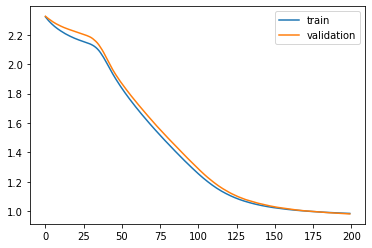

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

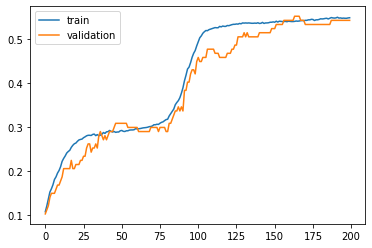

In [12]:
# plt.plot(history.history['acc'], label='train')
# plt.plot(history.history['val_acc'], label='validation')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

In [13]:
test_predictions = np.argmax(model.predict(X_test), axis=1)
accuracy = (test_predictions == y_test.values).sum() / y_test.values.shape[0]
print("Test set accuracy:", accuracy)

Test set accuracy: 0.5421052631578948


In [14]:
from sklearn.metrics import confusion_matrix
print("Y train")
print("Unique train labels:", np.unique(y_train.values))
print("Away win count:", (y_train==0).sum())
print("Draw count:", (y_train==1).sum())
print("Away win count:", (y_train==2).sum())

Y train
Unique train labels: [0 1 2]
Away win count: 738
Draw count: 621
Away win count: 1301


In [15]:
print("Train Prediction")
train_predictions = np.argmax(model.predict(X_train), axis=1)
print("Unique train labels:", np.unique(train_predictions))
print("Away win count:", (y_train==0).sum())
print("Draw count:", (y_train==1).sum())
print("Home win count:", (y_train==2).sum())

Train Prediction
Unique train labels: [0 1 2]
Away win count: 738
Draw count: 621
Home win count: 1301


In [16]:
# Train
df_conf_matrix = pd.DataFrame(confusion_matrix(y_train, train_predictions, labels=[0, 1, 2]), 
             index=['true home', 'true draw', 'true away'], columns=['pred home', 'pred draw', 'pred away'])
print("Train Data")
df_conf_matrix

Train Data


,pred home,pred draw,pred away
true home,350,3,385
true draw,185,4,432
true away,190,8,1103


In [17]:
# Test
df_conf_matrix = pd.DataFrame(confusion_matrix(y_test, test_predictions, labels=[0, 1, 2]), 
             index=['true home', 'true draw', 'true away'], columns=['pred home', 'pred draw', 'pred away'])
print("Test Data")
df_conf_matrix

Test Data


,pred home,pred draw,pred away
true home,49,0,64
true draw,21,1,61
true away,27,1,156
